In [184]:
from pathlib import Path
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import itertools
import json
from typing import Iterable
from matplotlib.figure import Figure
import pandas as pd


def gen_color_map(cmap_name):
    i = 0
    cmap = plt.get_cmap(cmap_name)
    while True:
        yield cmap(i)
        i += 1


def recurvive_call(input, depth, callable):
    for d in range(depth):
        input = callable(input)
    return input


def plot_loss_history(fig: Figure, axs: Iterable[Axes], exp_dir: Path):
    ax: Axes = next(axs)
    ax.set_title("Loss coefficients' values by iteration")
    loss_history = pd.read_csv(exp_dir / "loss_history.csv", delimiter=";")
    loss_names = loss_history["loss_name"].unique()
    for loss_name in loss_names:
        named_loss_history = loss_history[loss_history["loss_name"] == loss_name]
        ax.plot(named_loss_history["iteration"],
                named_loss_history["loss"], label=loss_name)
        ax.legend(labels=loss_names, loc="upper right")


def table_metrics(fig: Figure, ax: Iterable[Axes], exp_dir: Path):
    ax: Axes = next(ax)
    ax.set_title("Average Metrics Over Views and Frames")
    ax.axis("off")
    try:
        metrics = recurvive_call(json.load(
            (exp_dir/"30000_runtimeresults.json").open("r")), 2, lambda dic: next(iter(dic.values())))
        ax.table(list(metrics.items()), bbox=(0, 0, 1, 1), colWidths=(.2, 1))
    except FileNotFoundError:
        ax.text(.5, .5, "Experiment failed", ha="center", va="center")
        return


def plot_gt_render_comparison(fig: Figure, axs: Iterable[Axes], exp_dir: Path):
    for imno, imdir in itertools.product(
        [f"{i:>05}.png" for i in ["0", "47"]],
        ["gt", "renders"],
    ):
        ax: Axes = next(axs)
        try:
            ax.set_title(f"{imdir}/{imno}")
            ax.axis("off")
            image = plt.imread(exp_dir / "test"/"ours_30000" / imdir / imno)
            ax.imshow(image)
        except FileNotFoundError:
            ax.text(.5, .5, "Experiment failed", ha="center", va="center")

/tmp/ipykernel_59828/2325589676.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 6, layout="constrained", figsize=(20, 4))


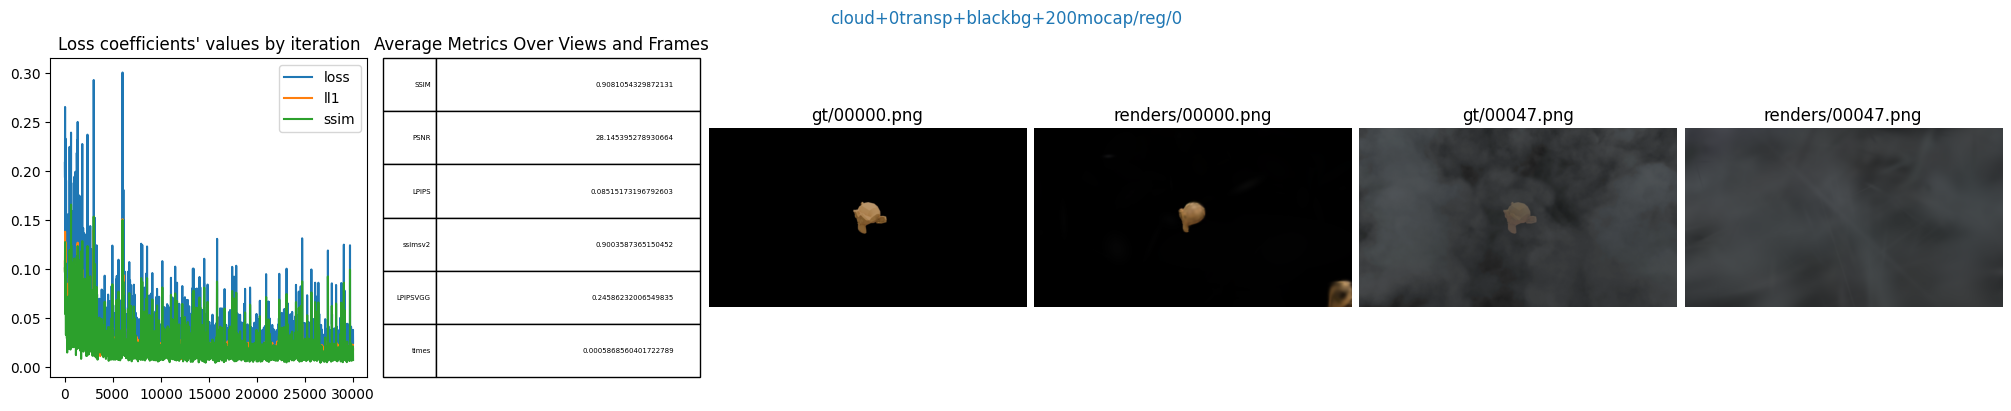

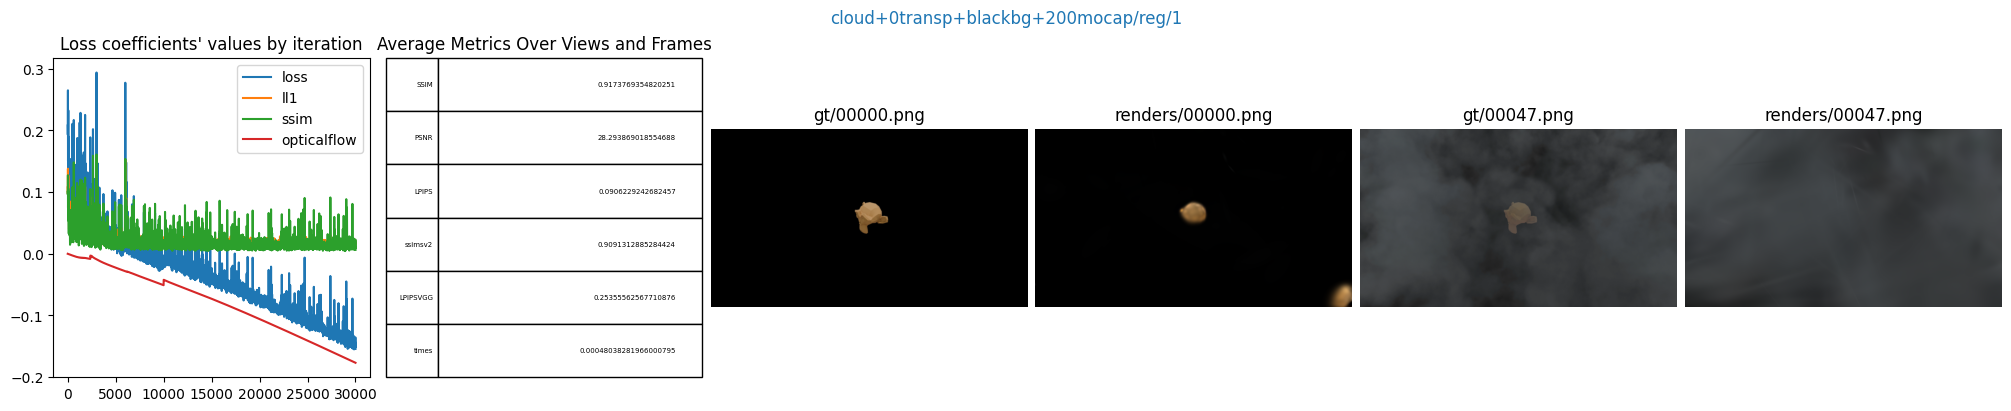

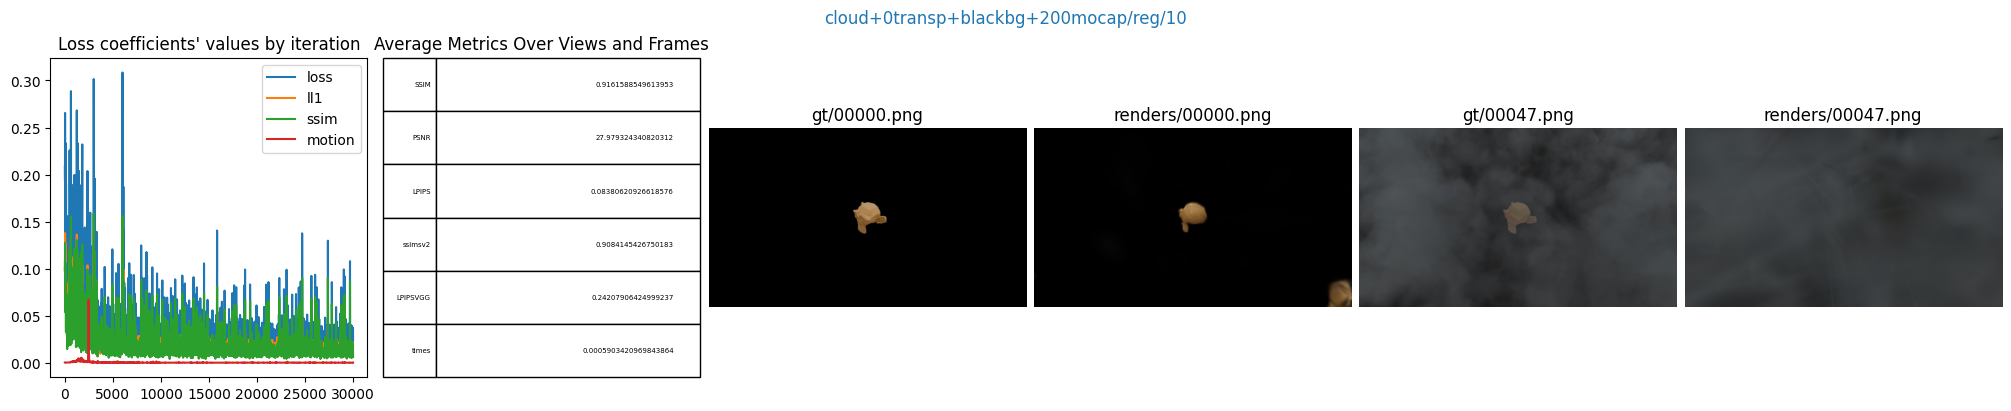

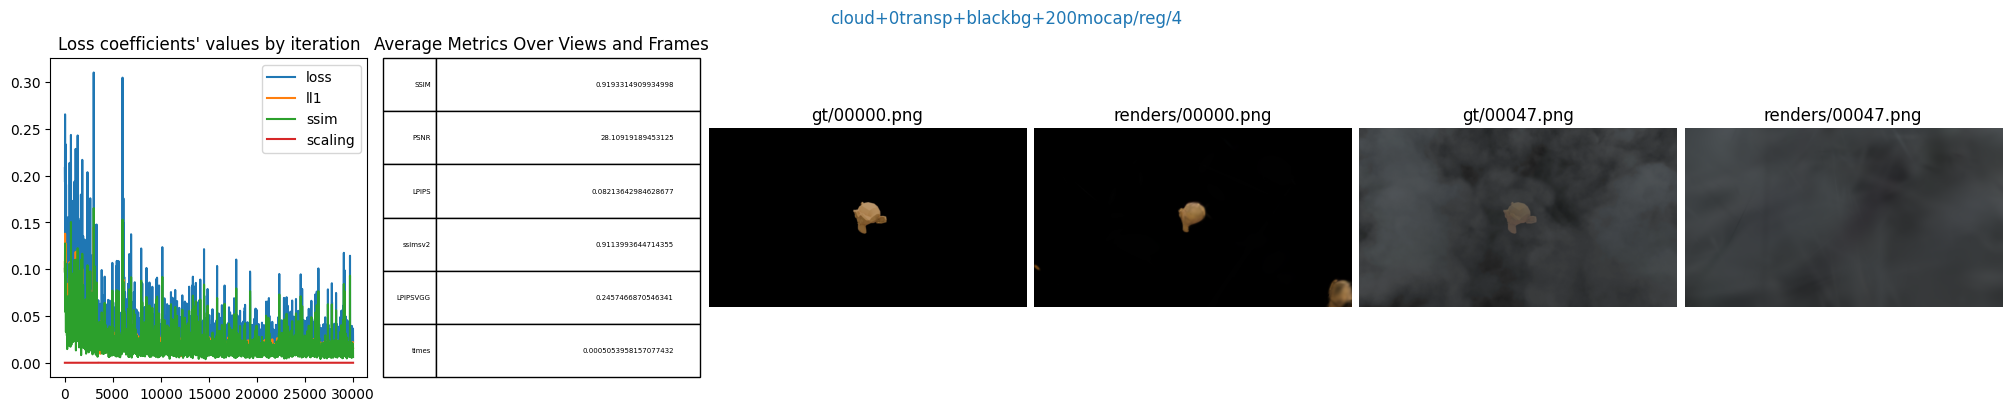

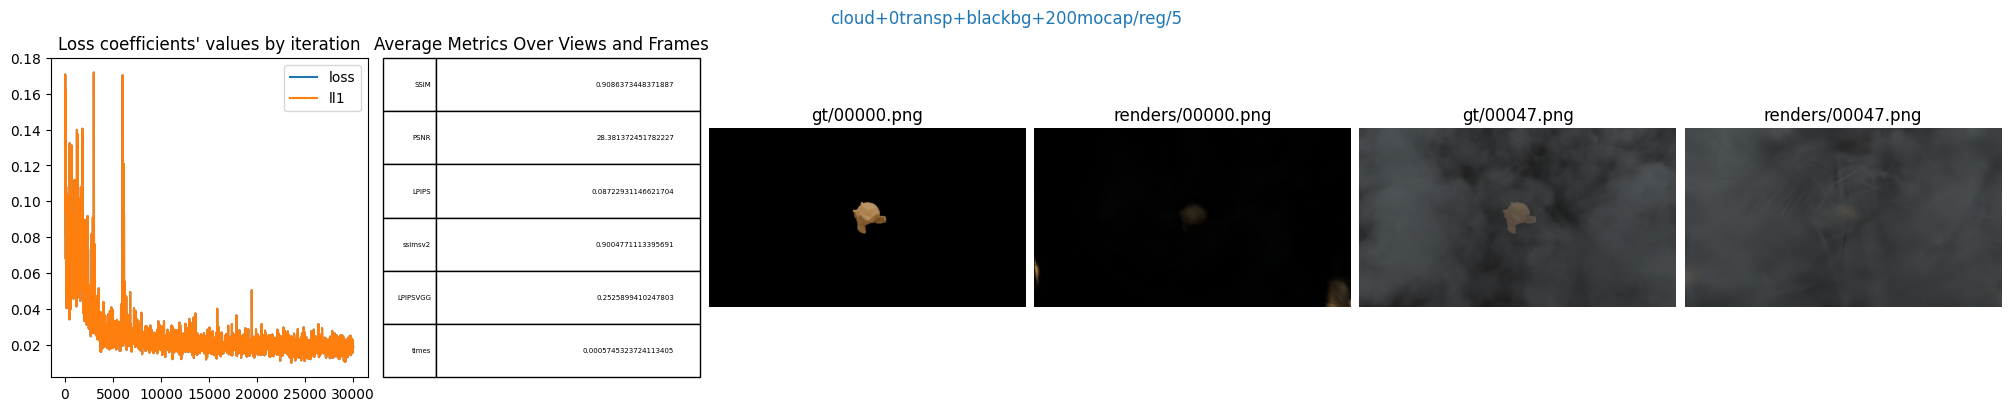

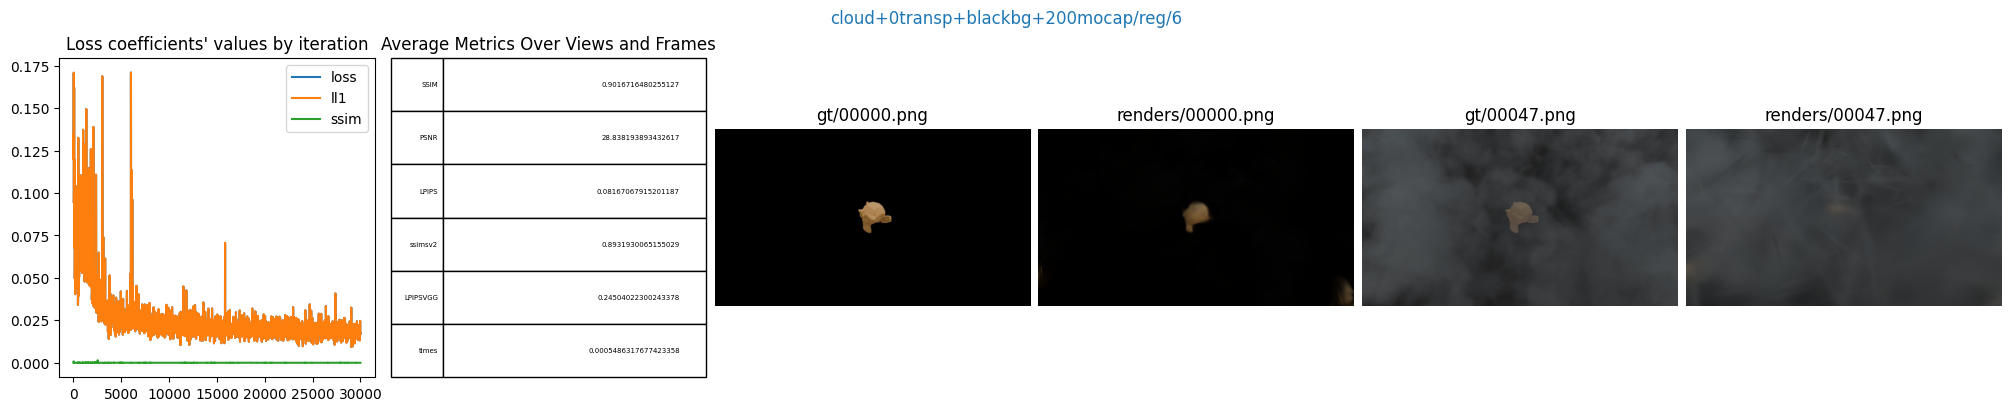

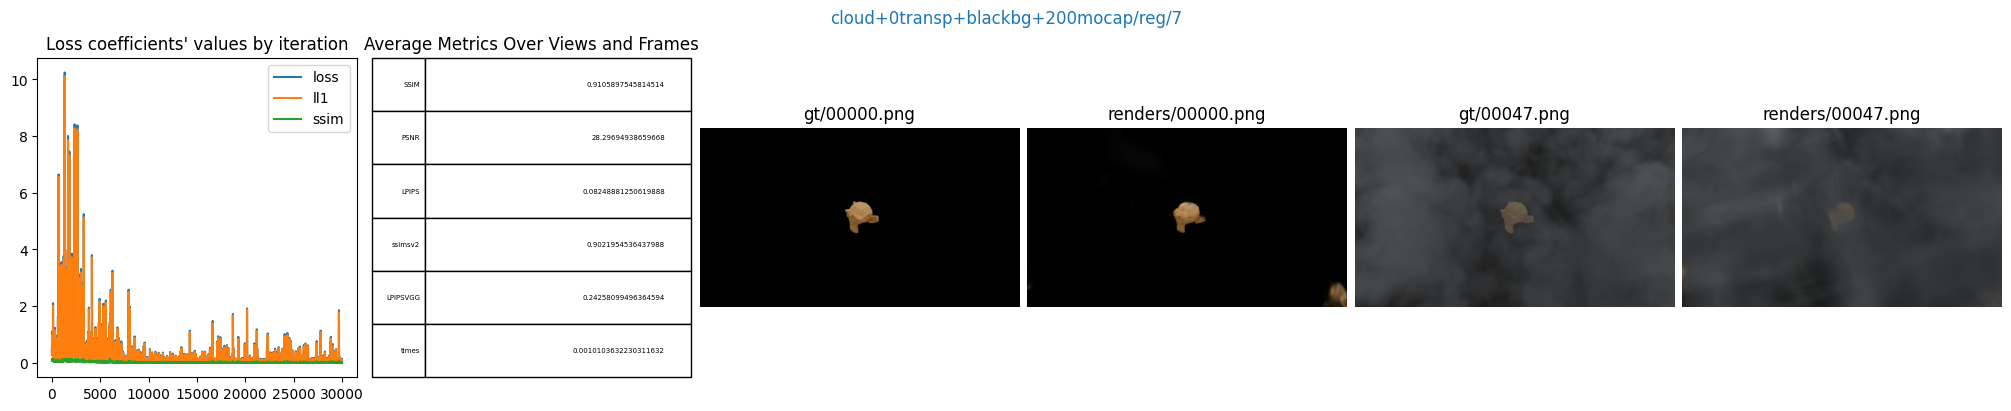

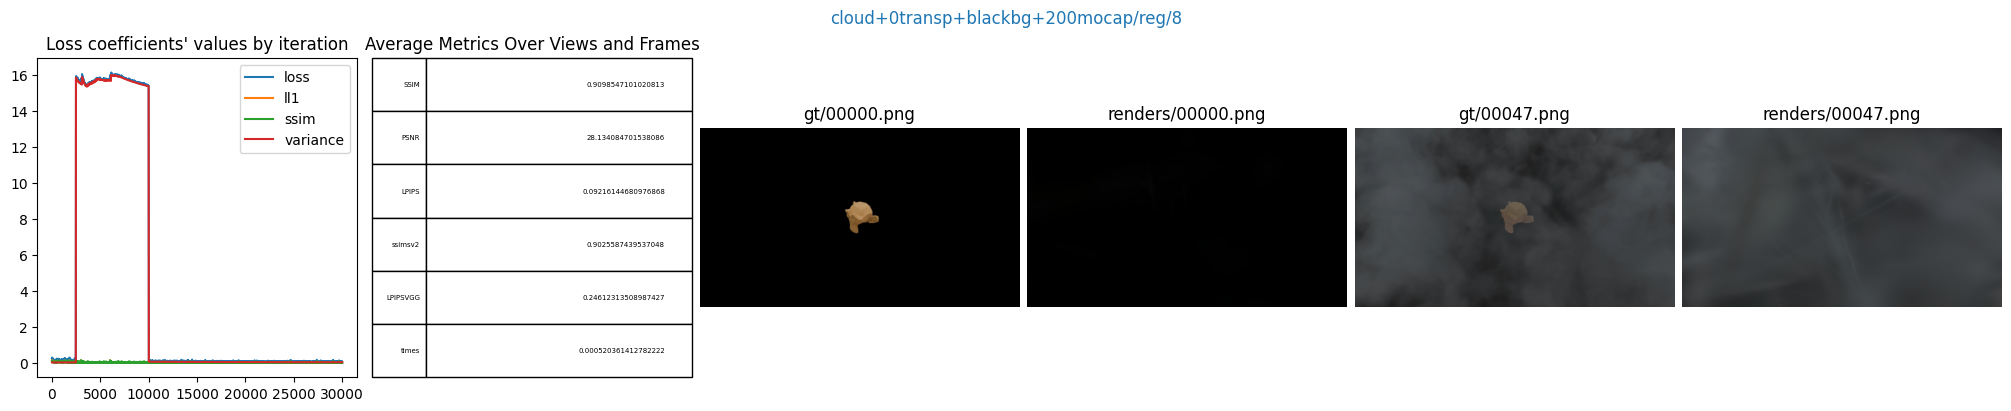

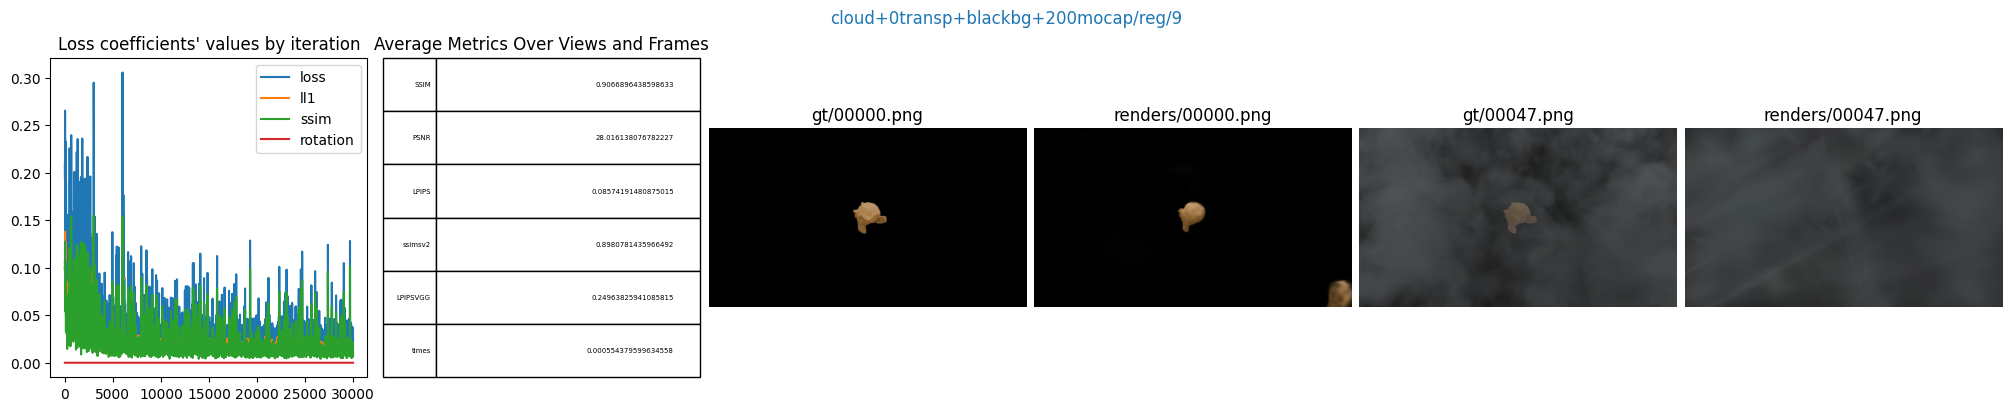

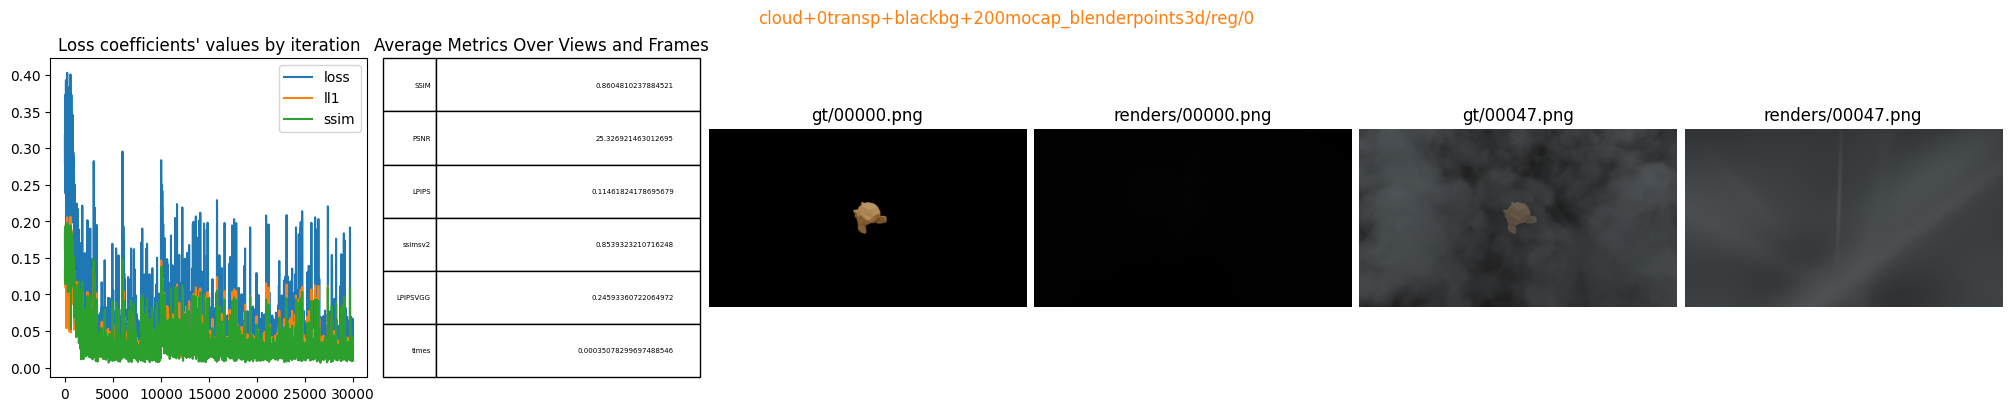

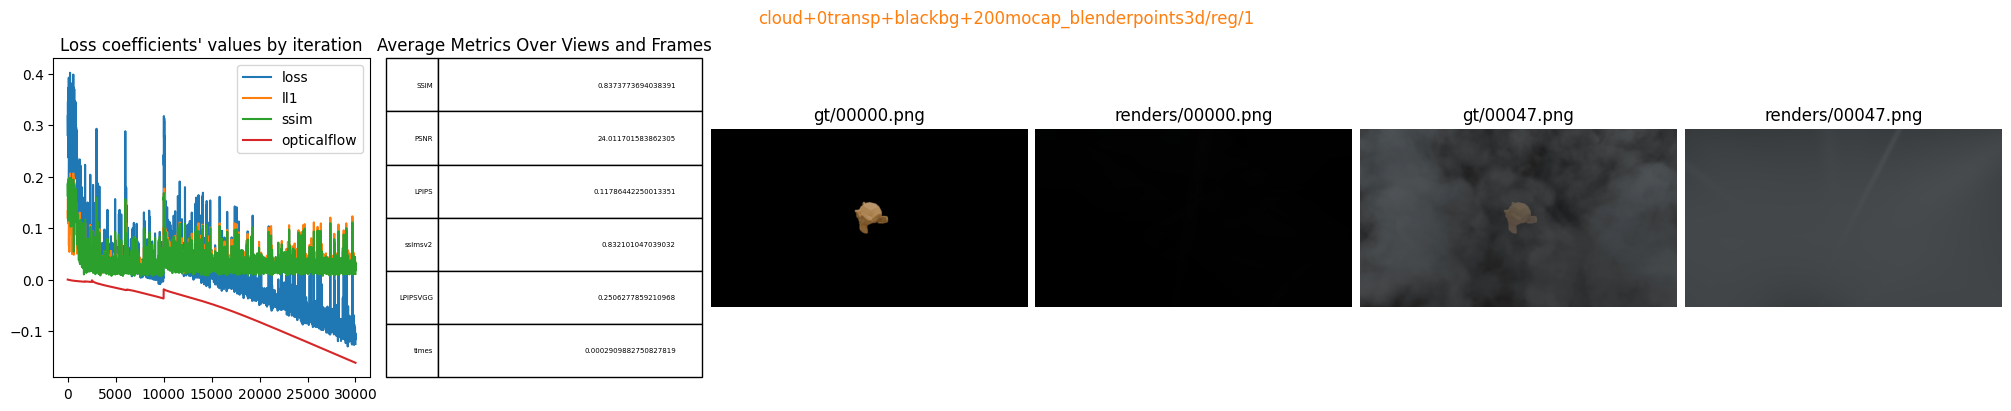

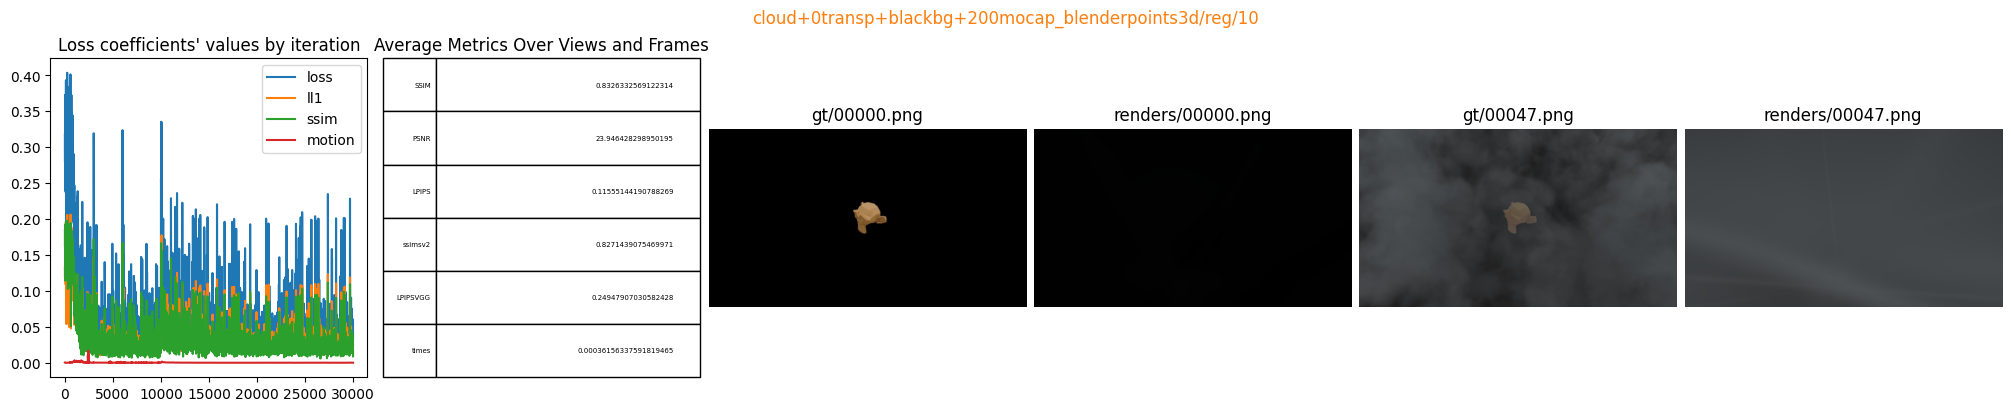

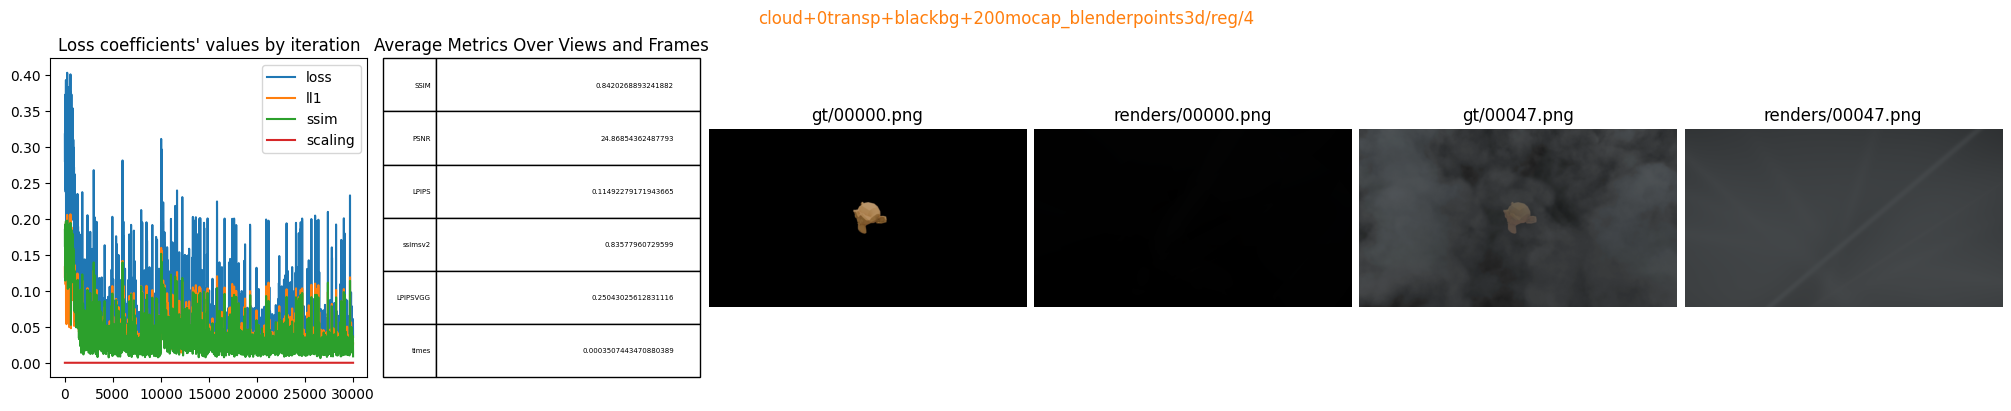

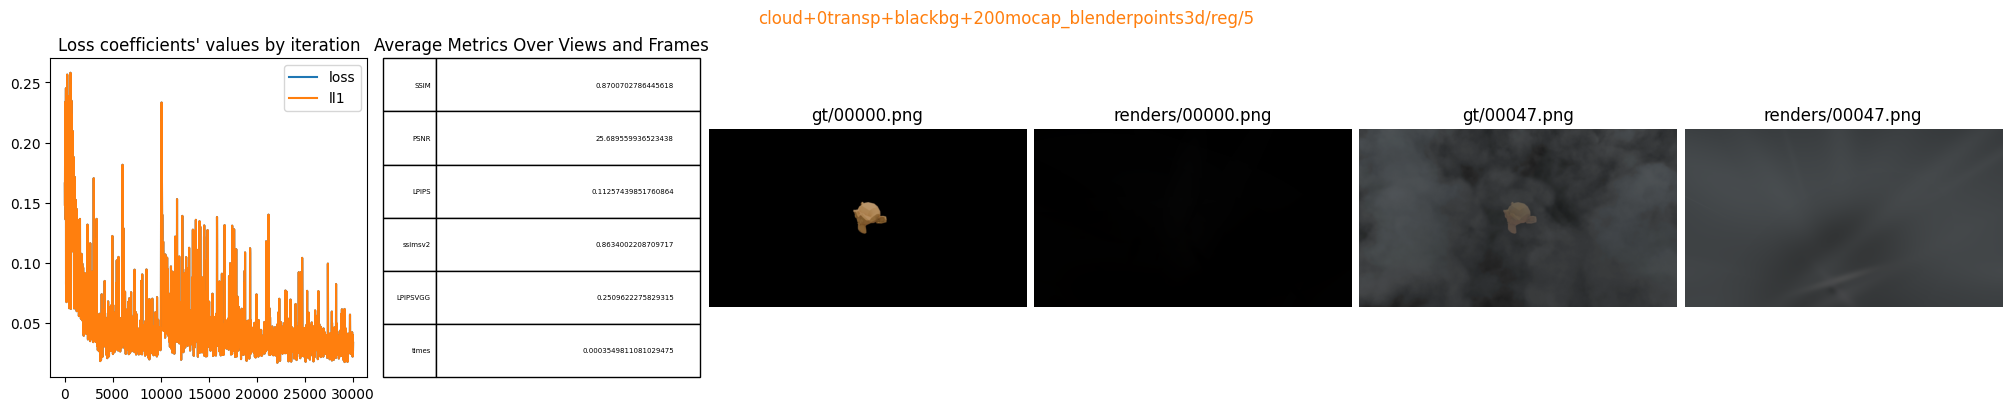

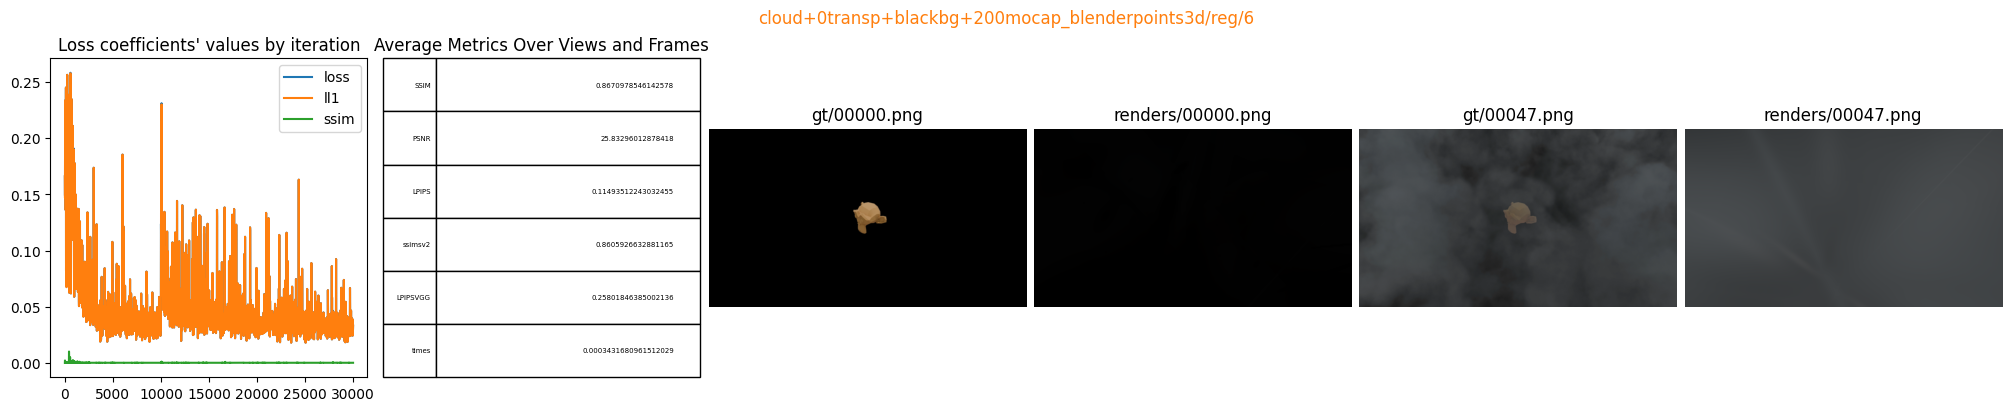

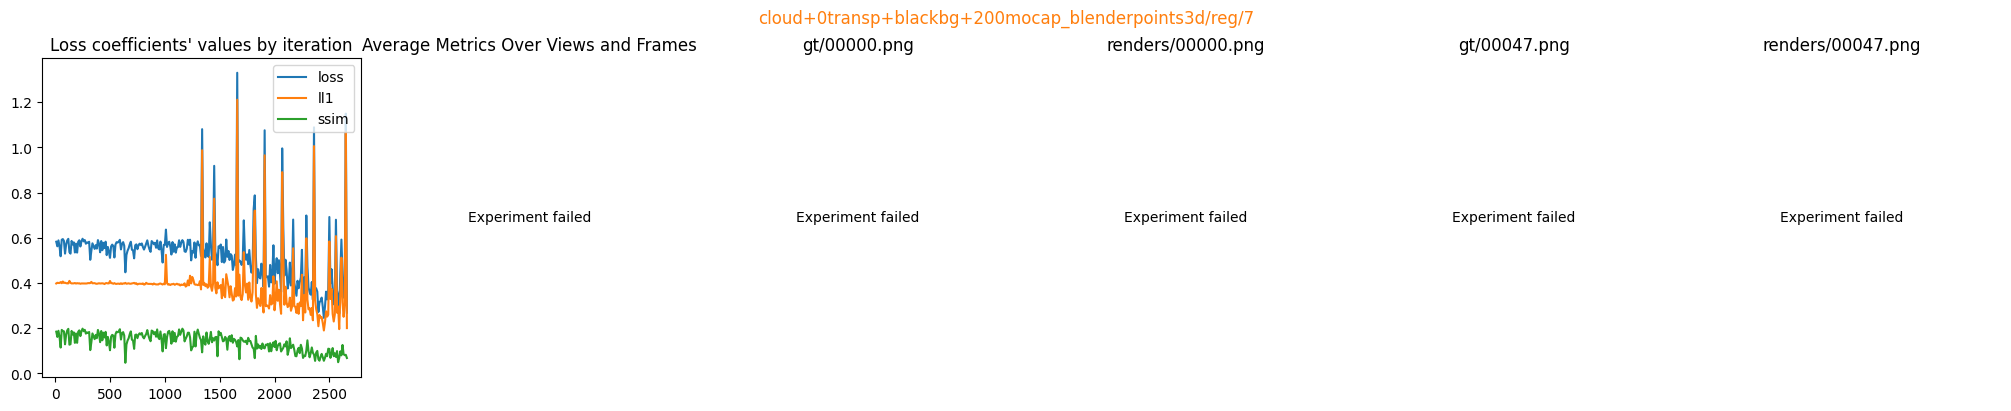

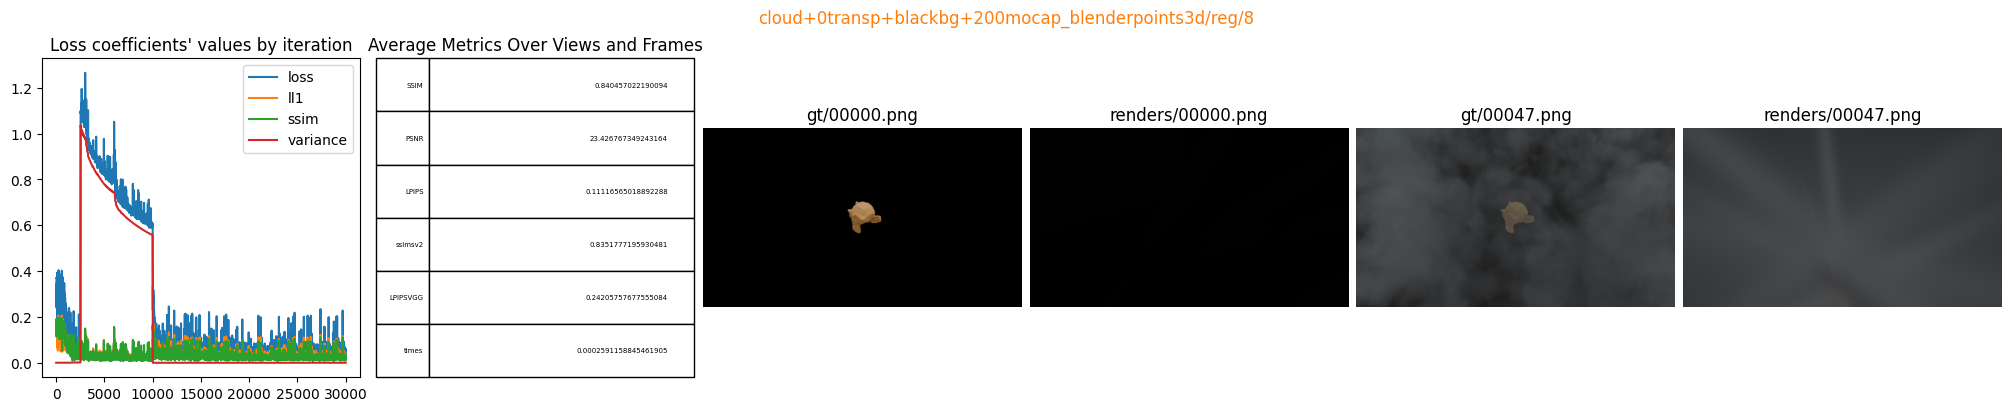

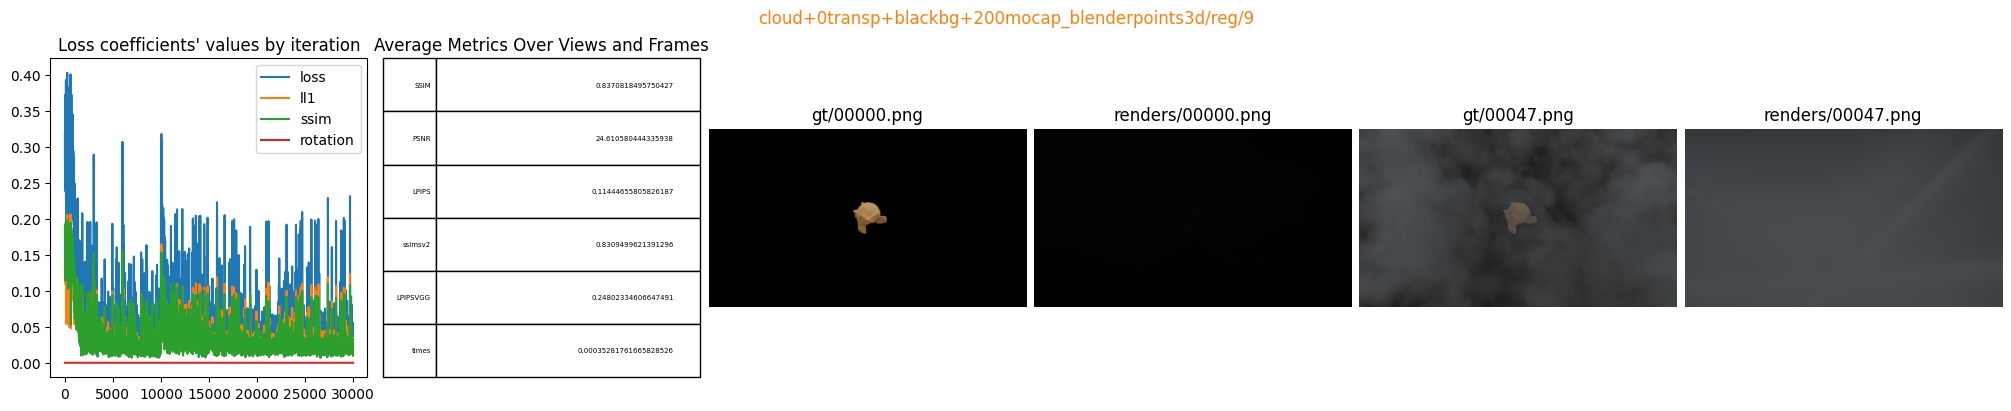

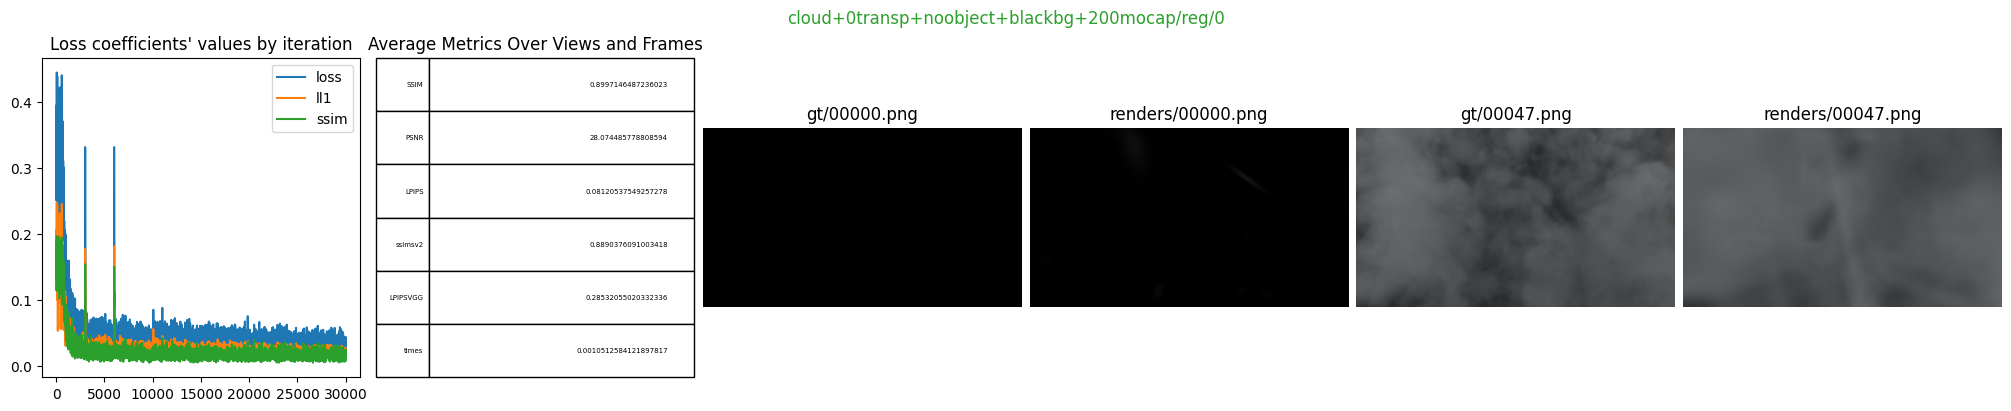

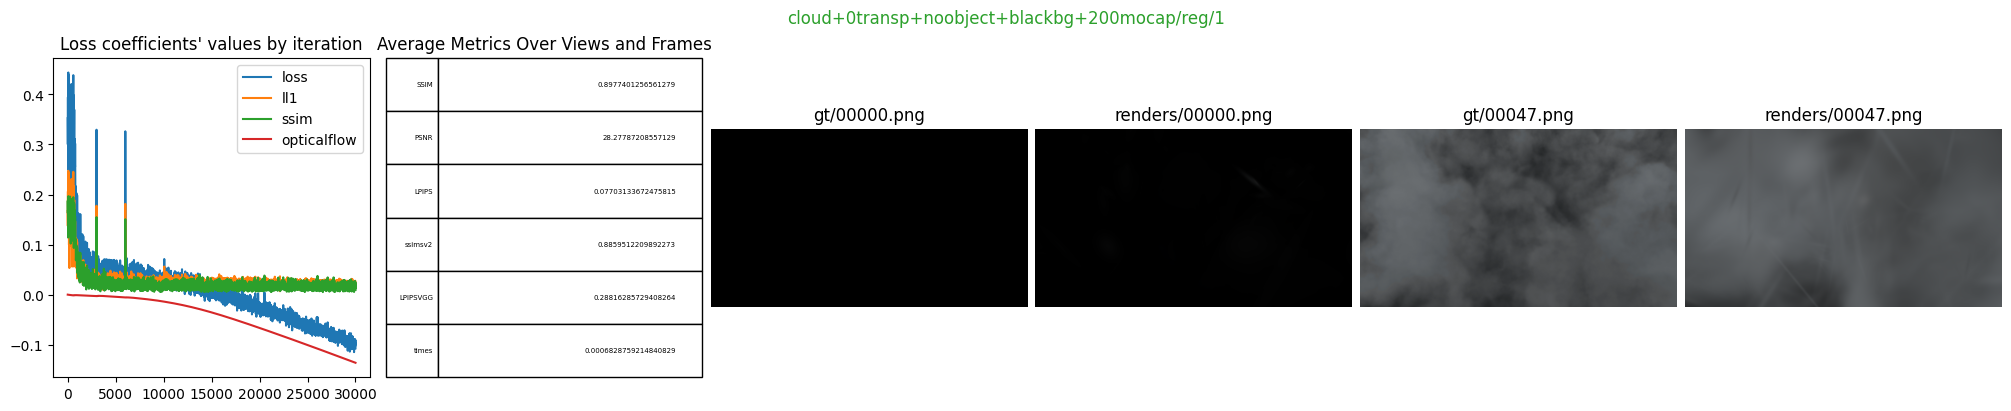

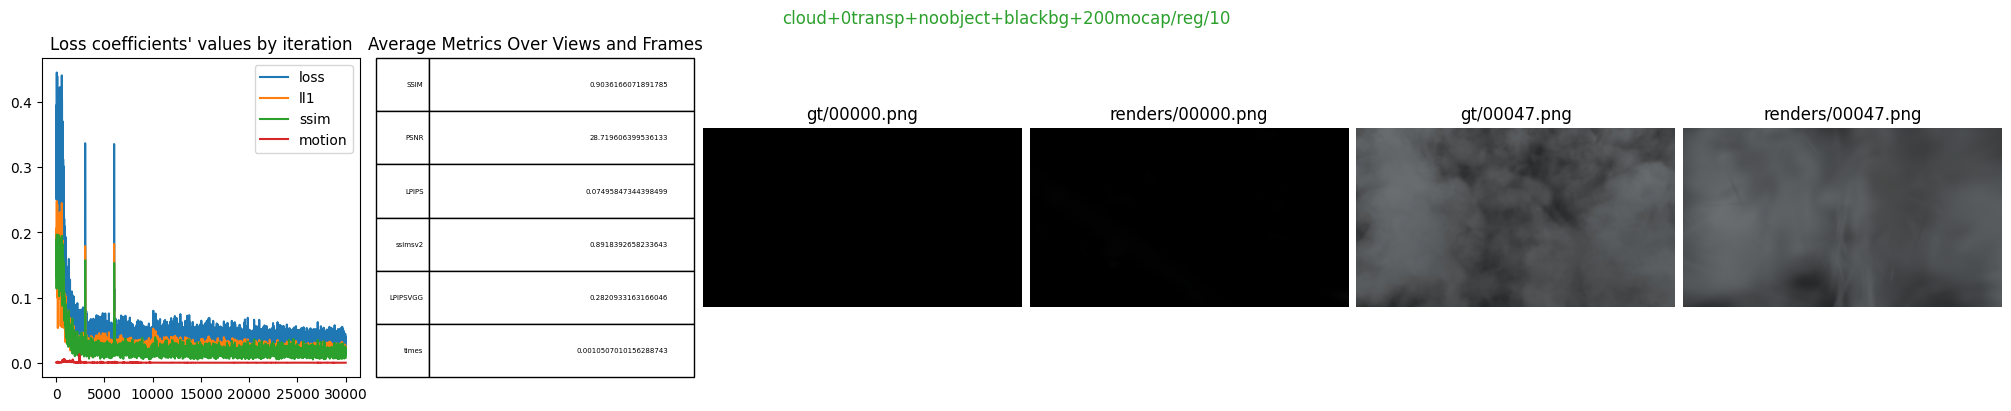

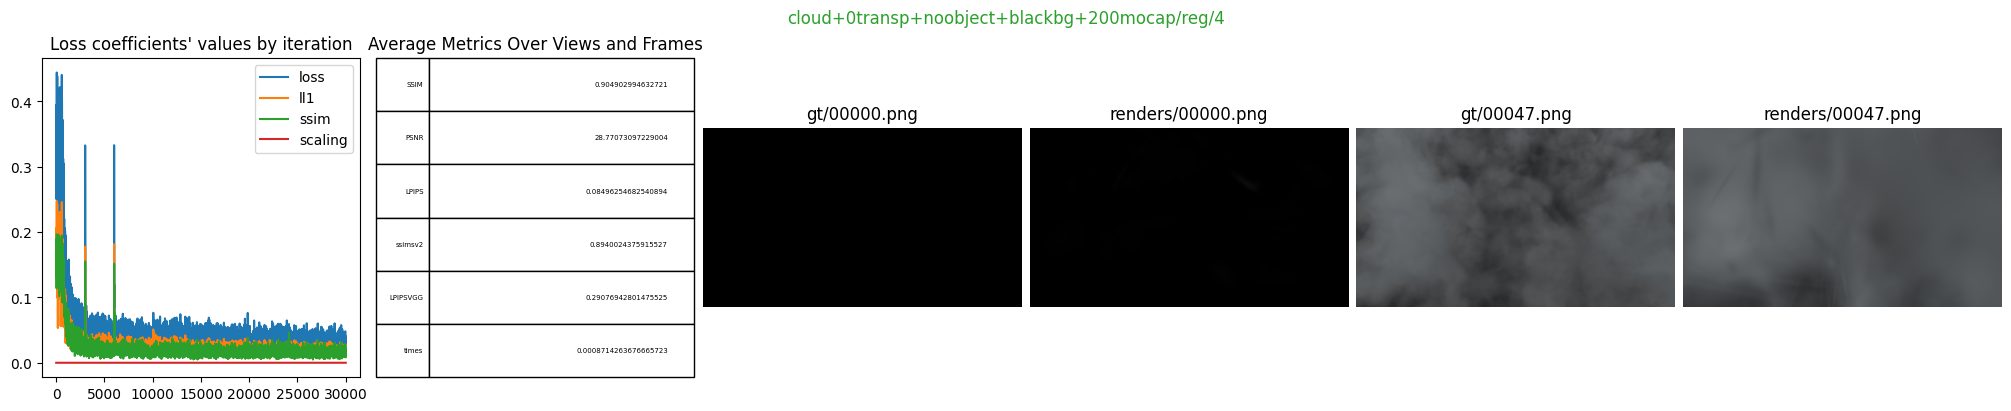

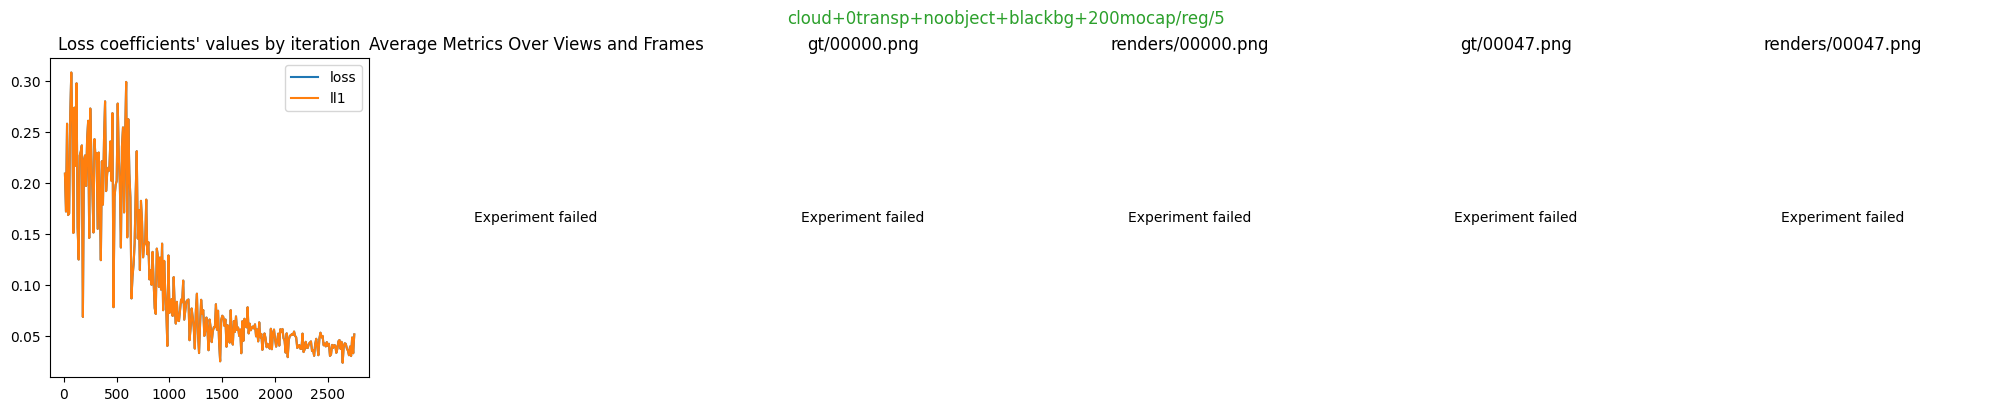

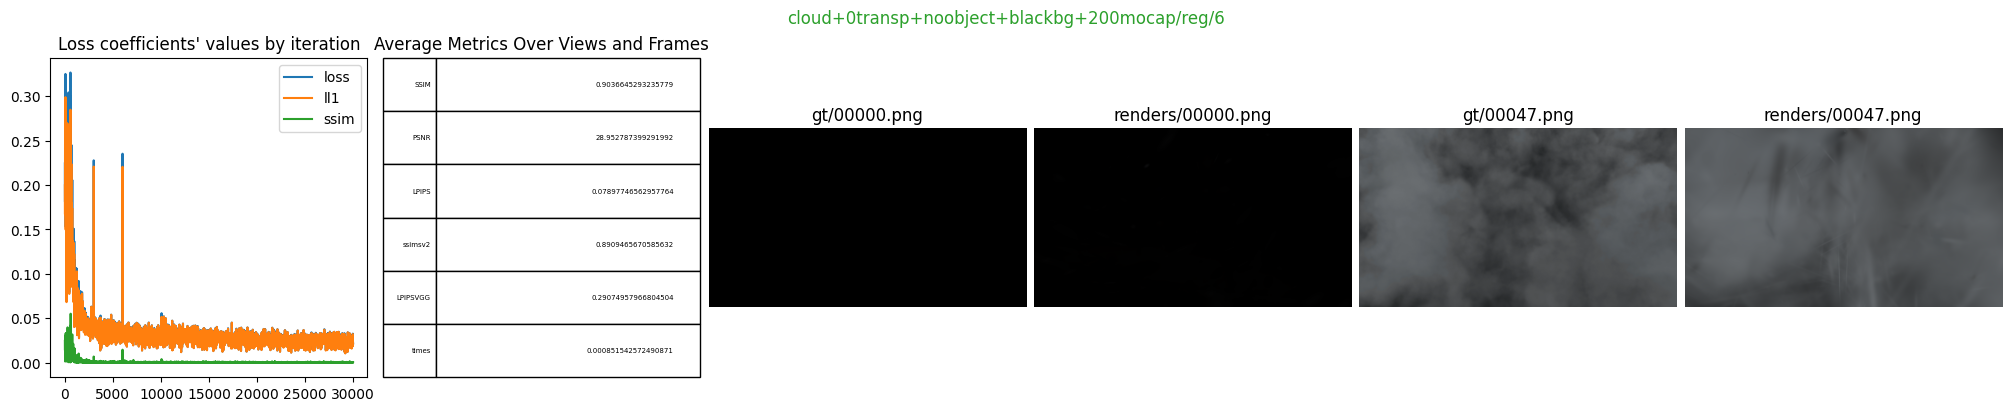

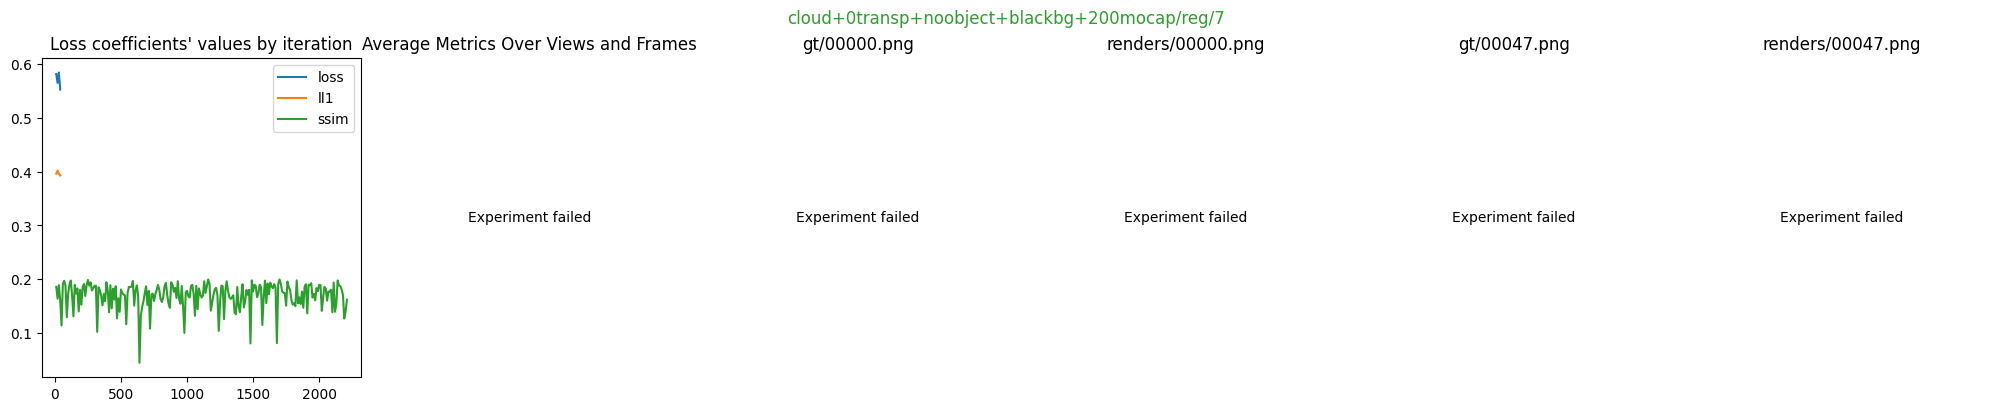

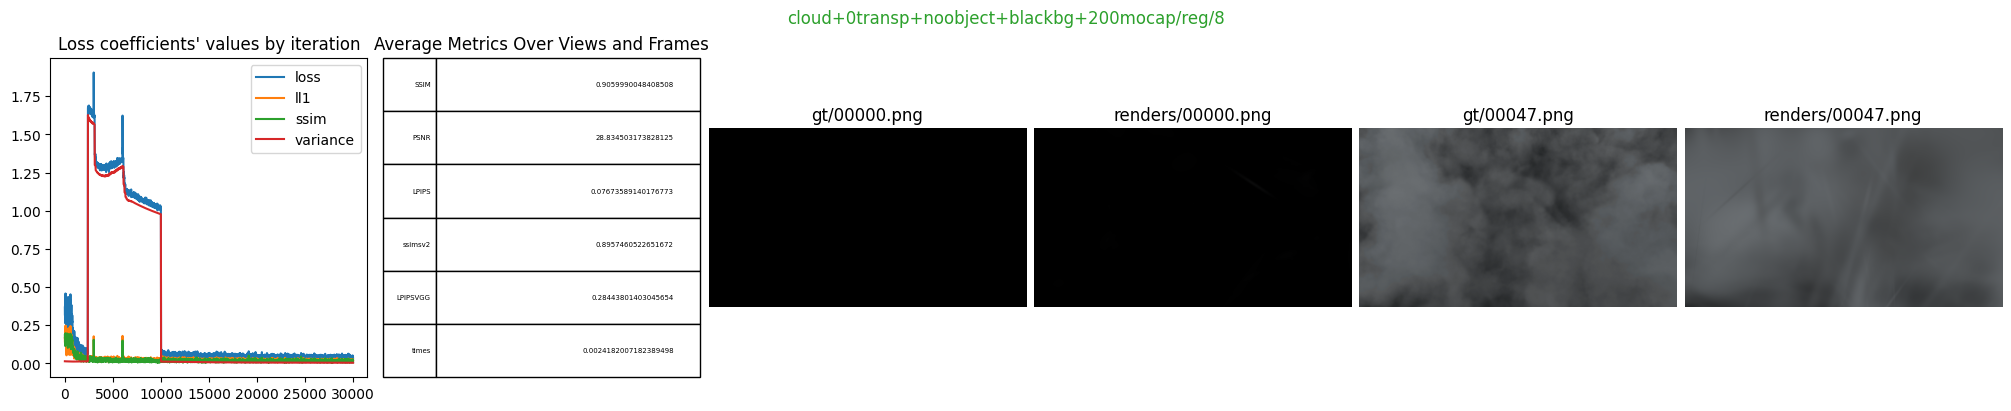

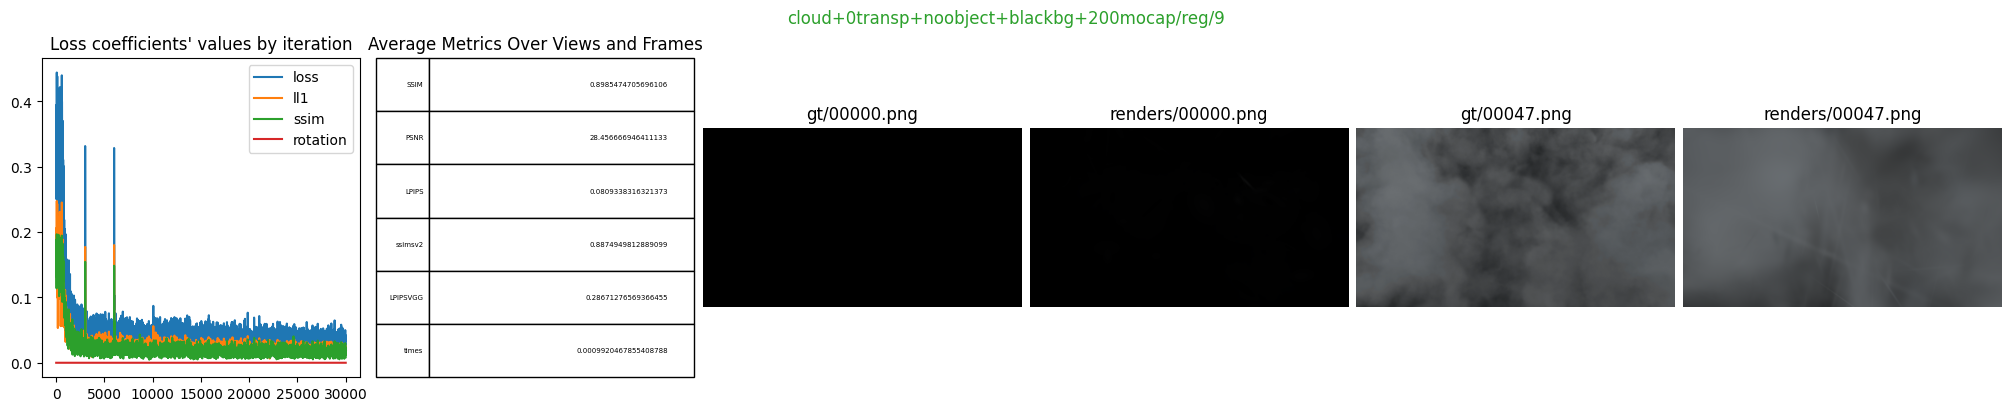

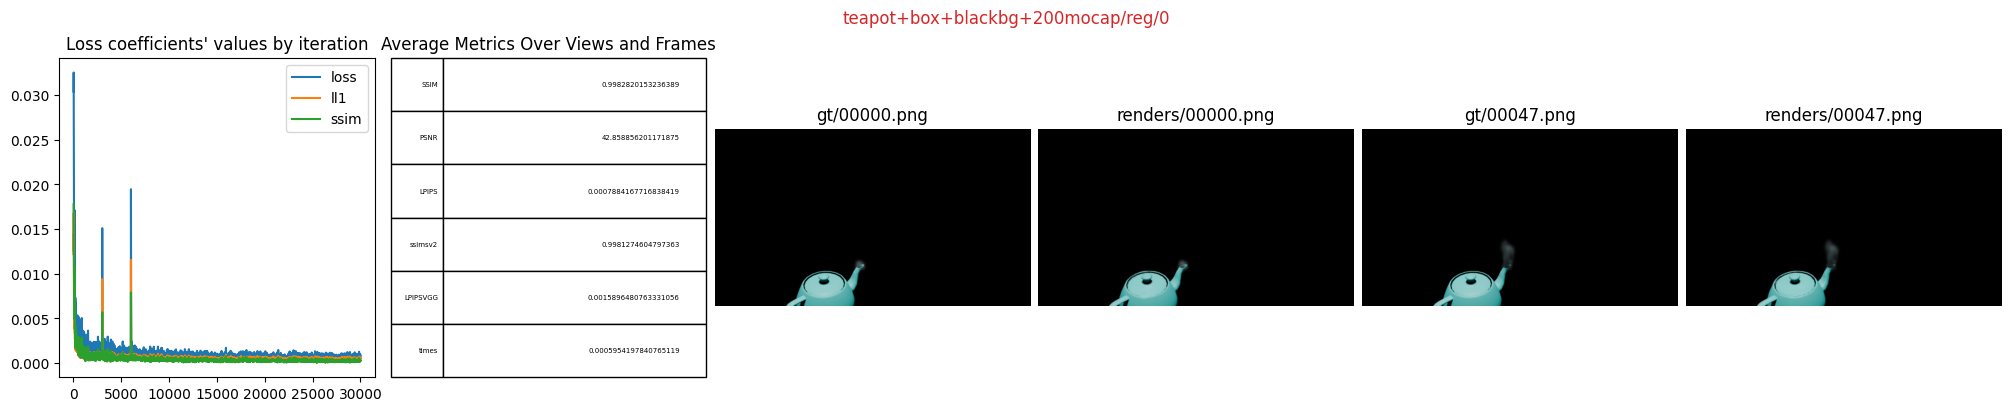

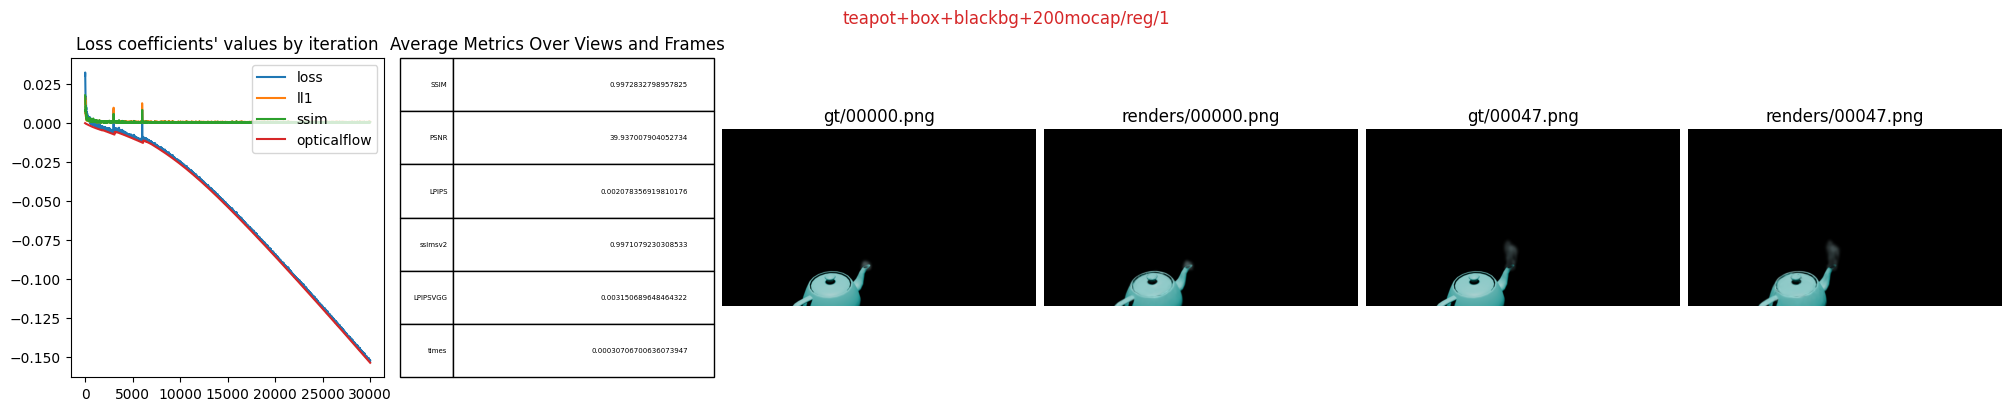

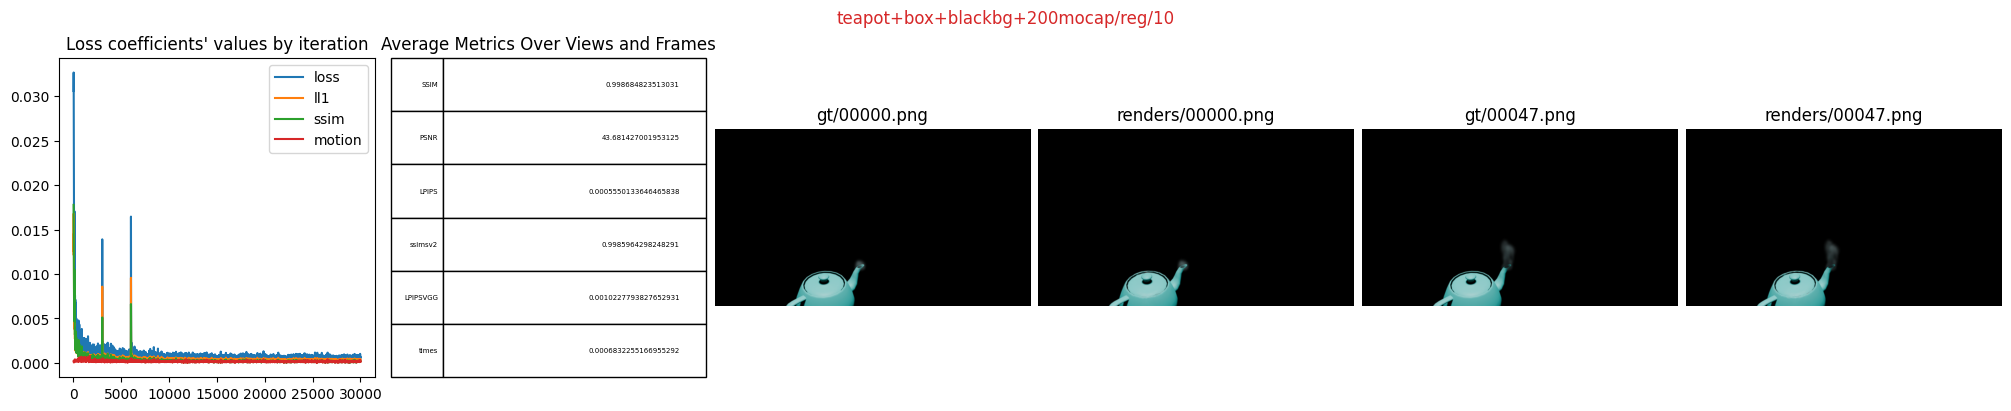

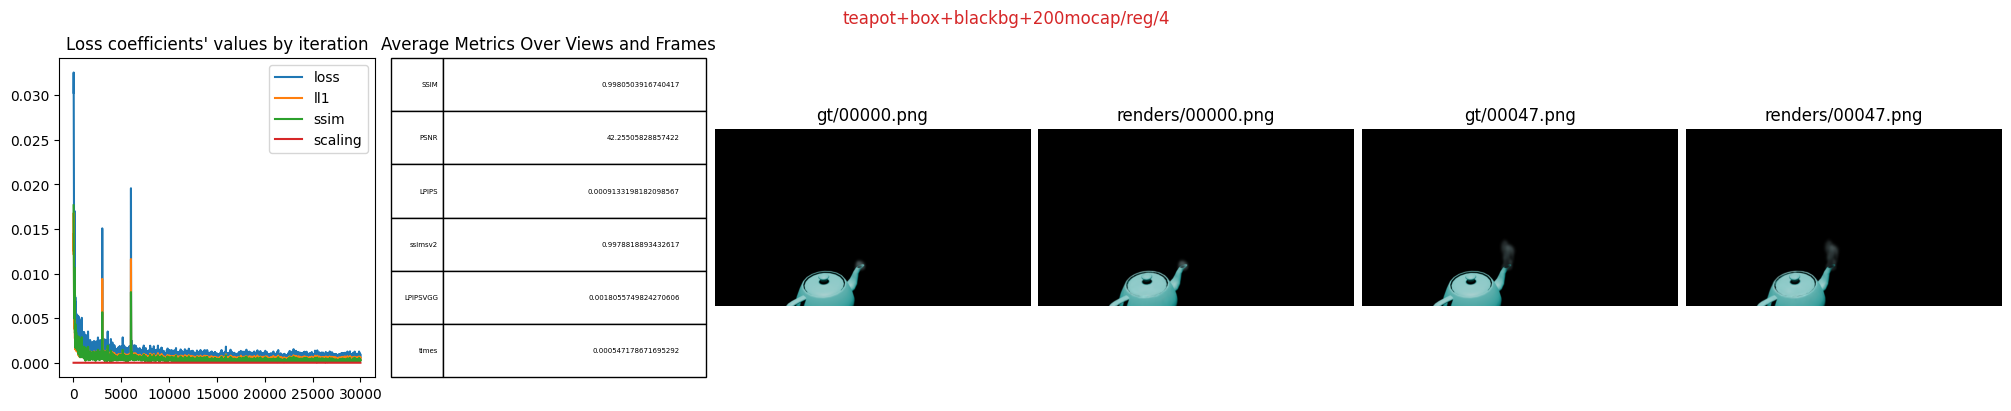

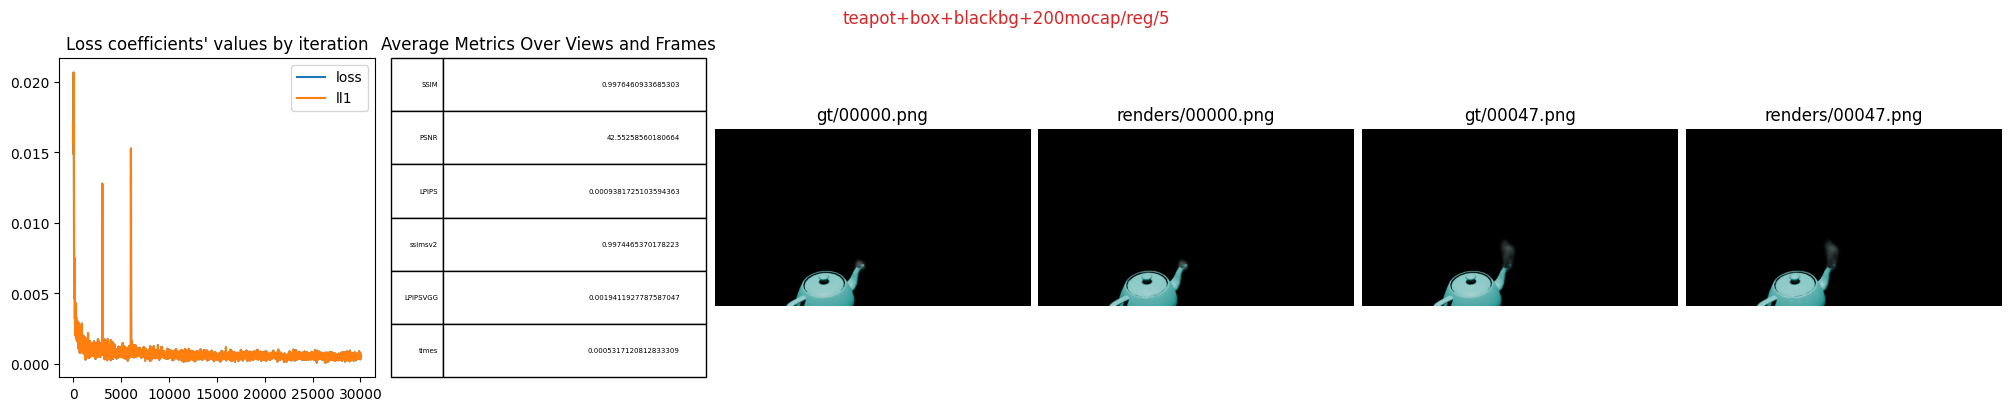

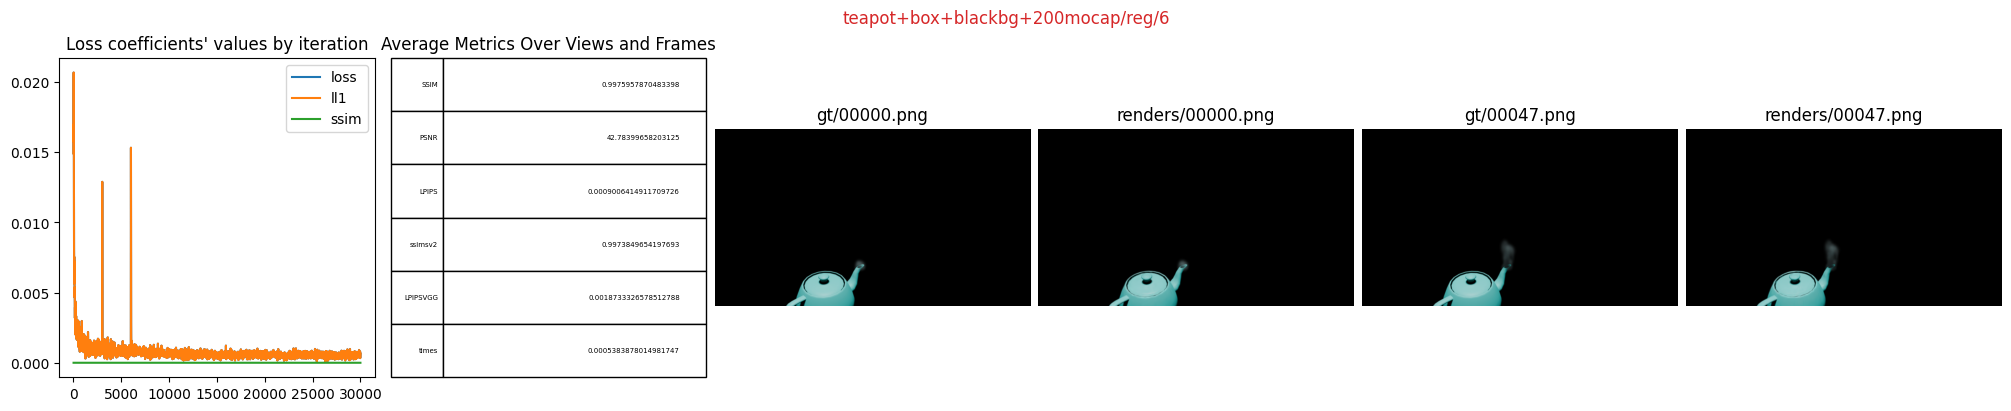

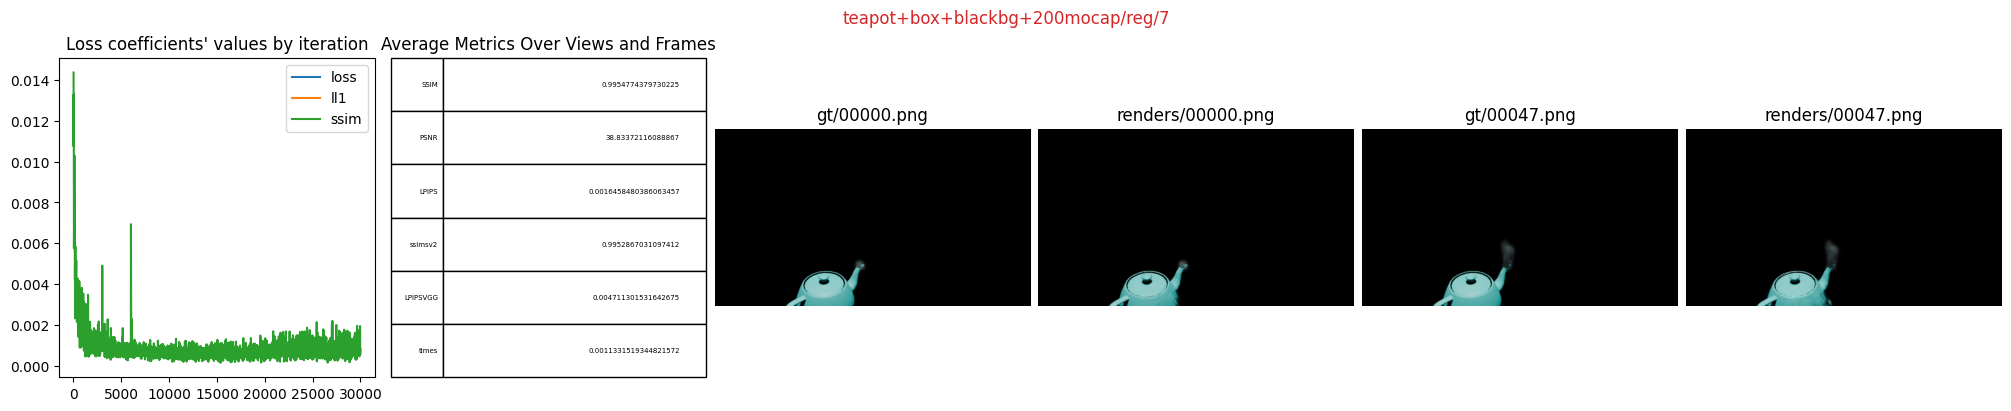

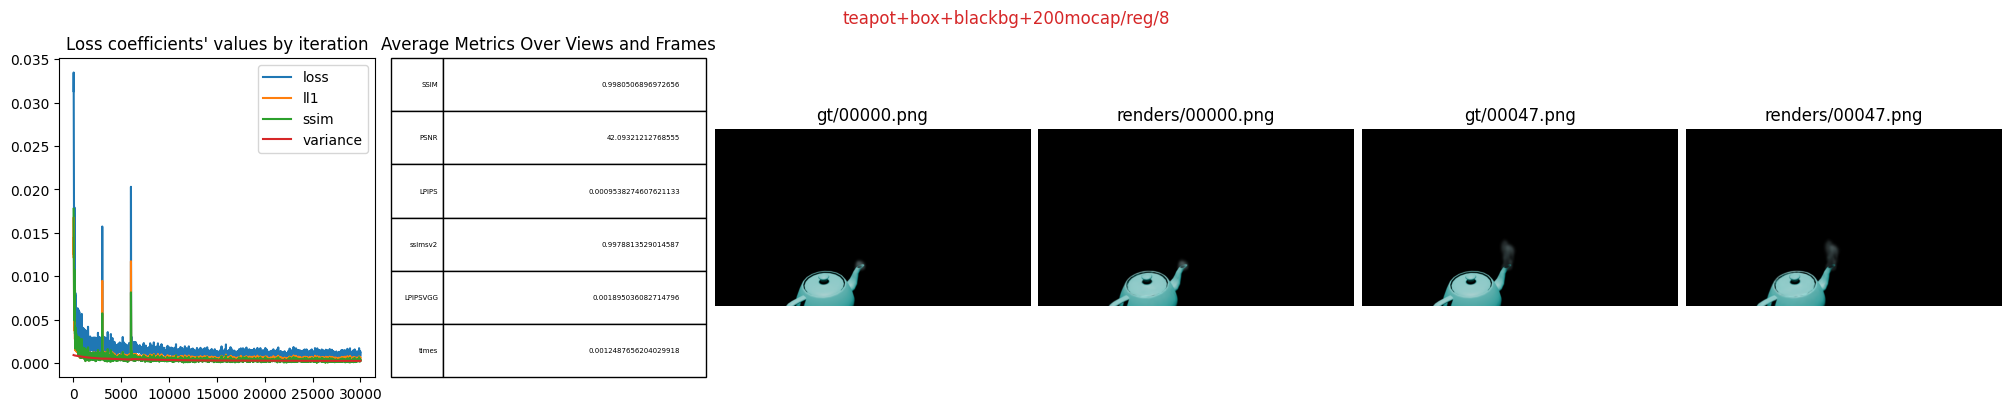

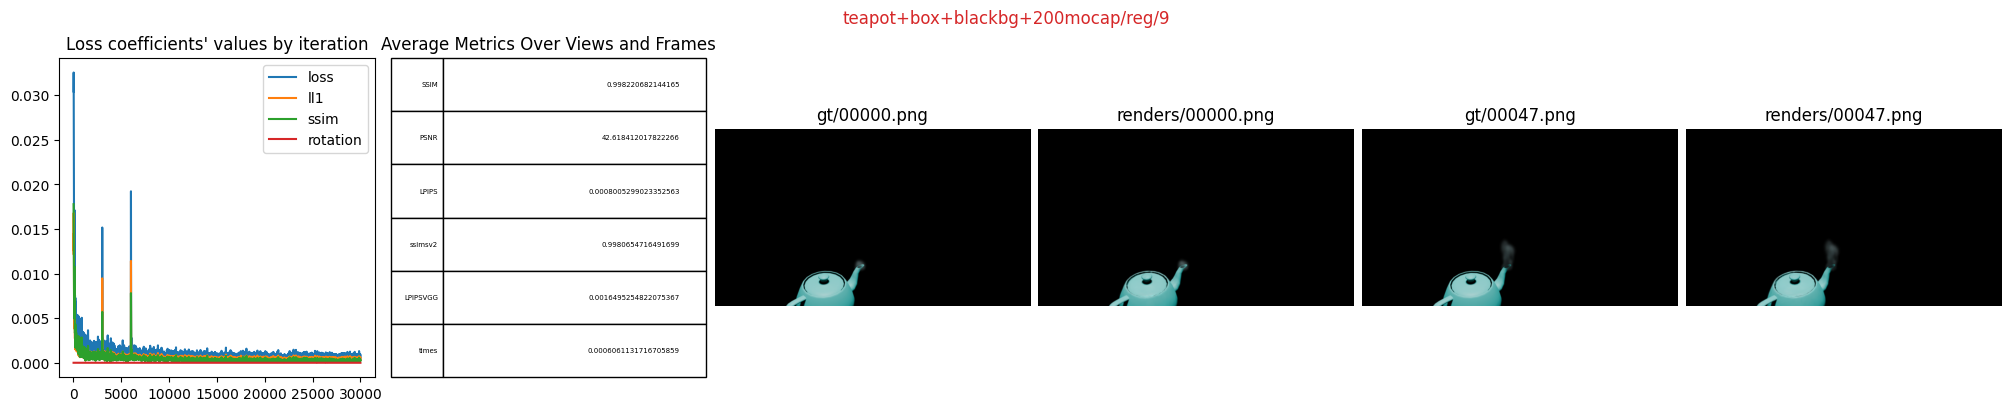

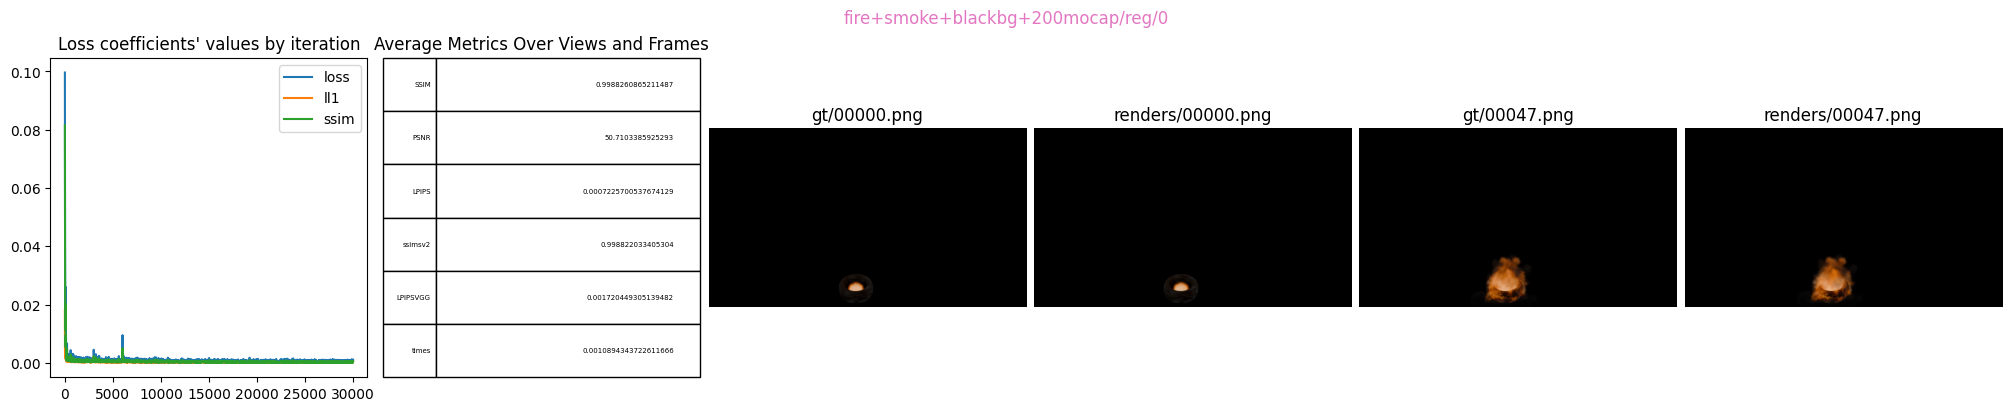

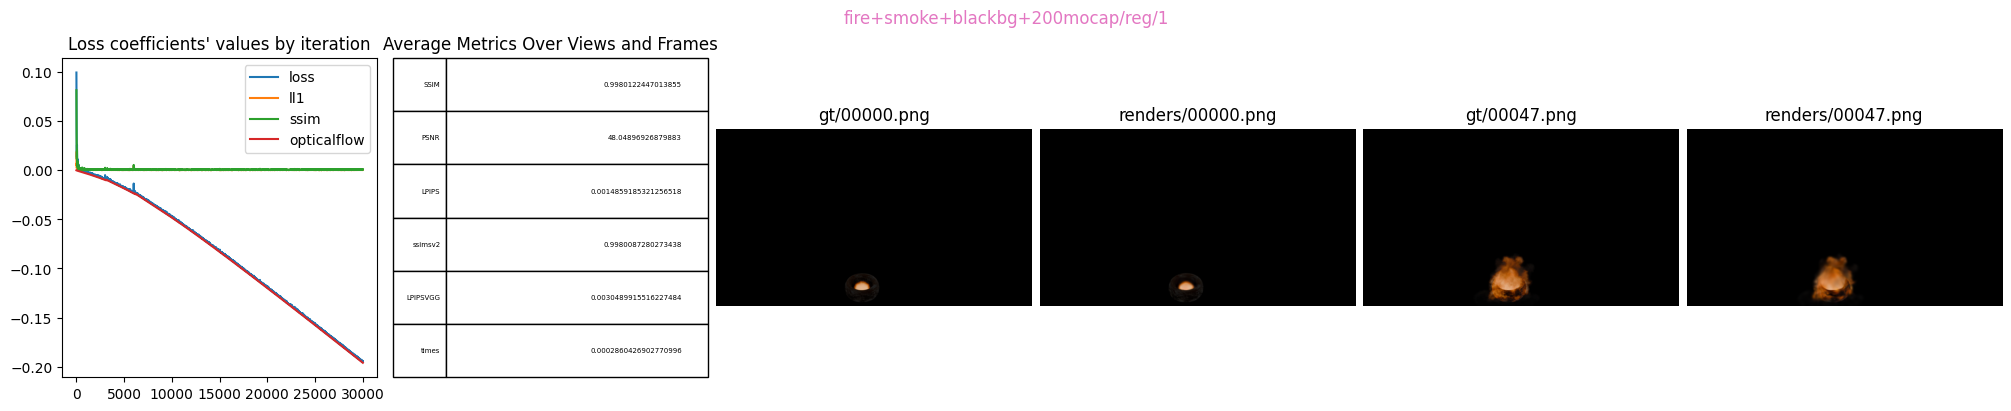

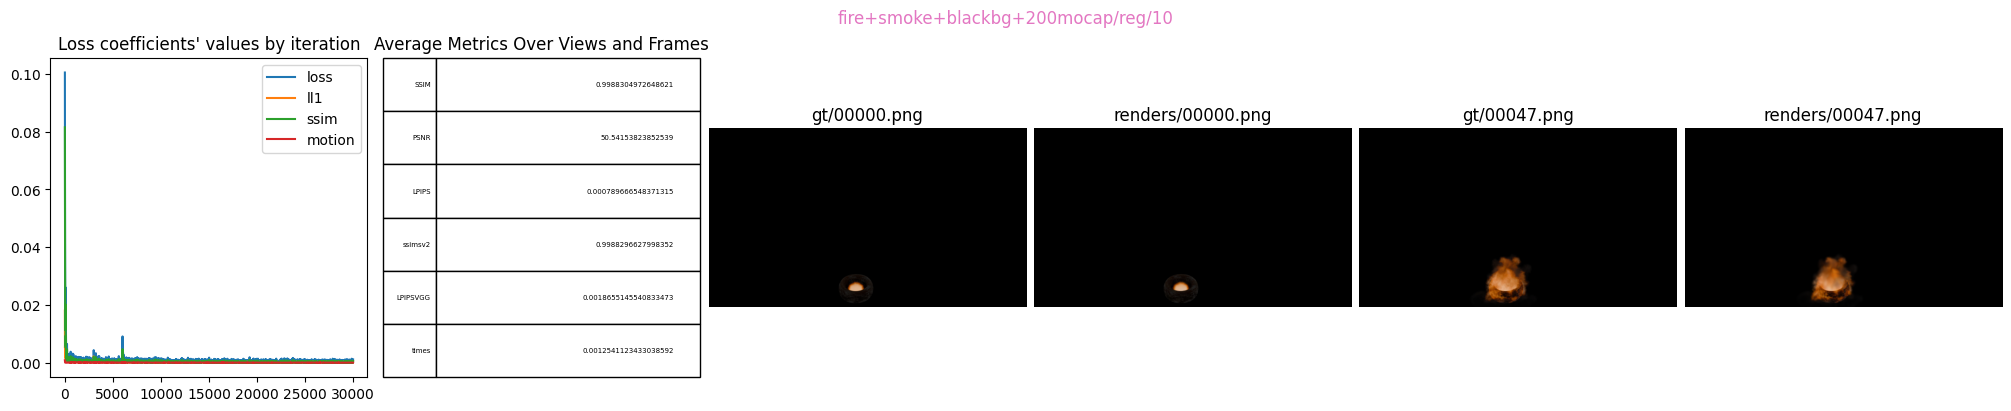

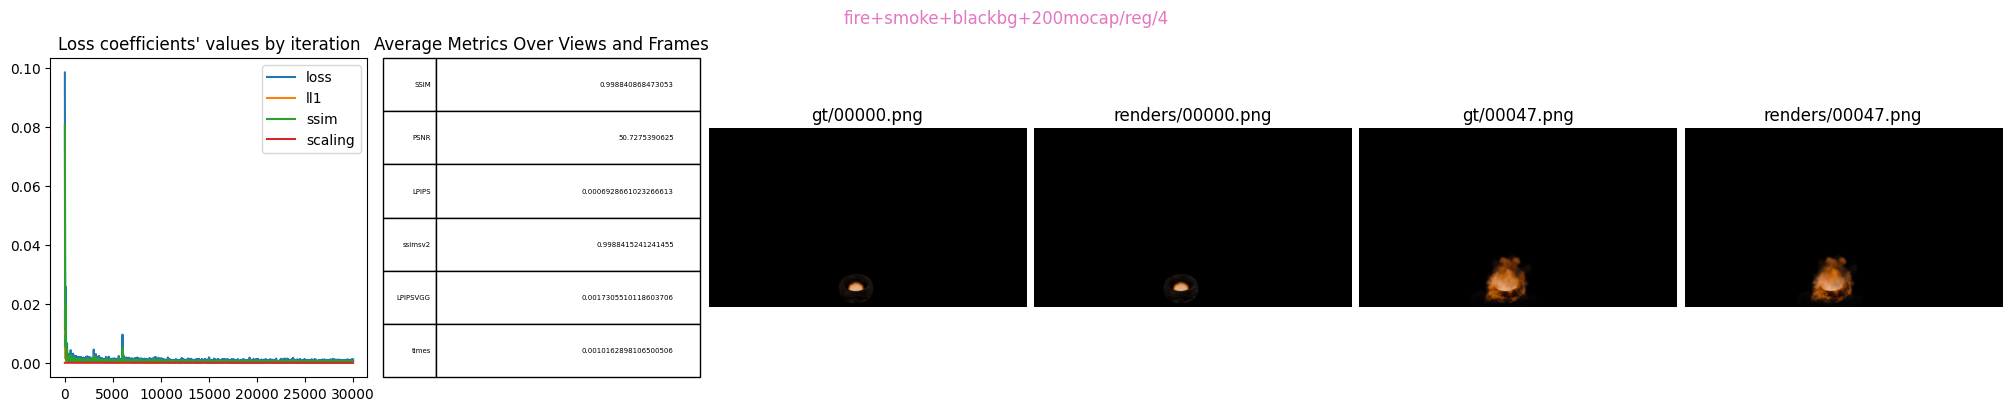

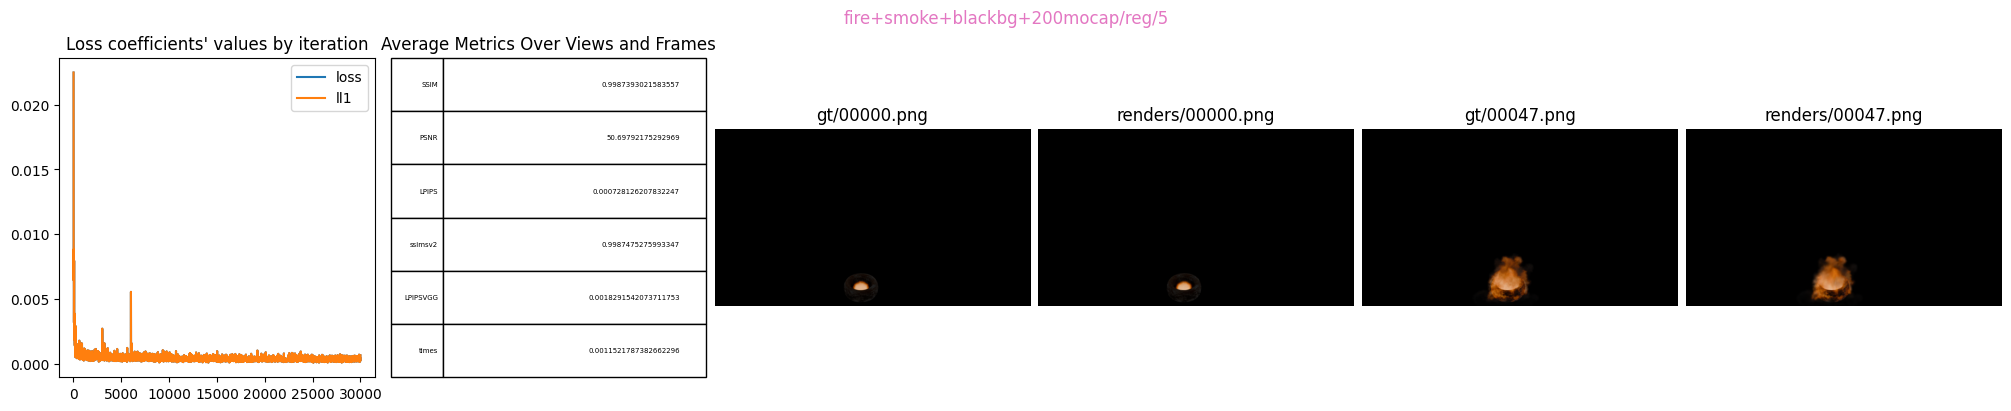

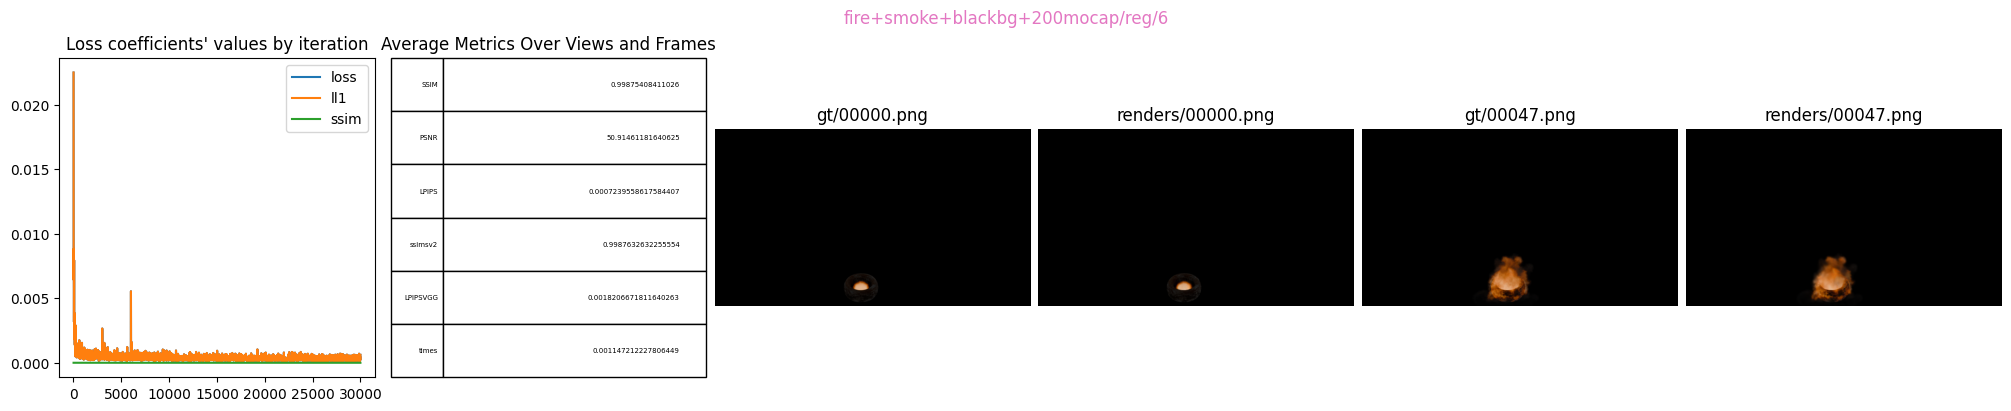

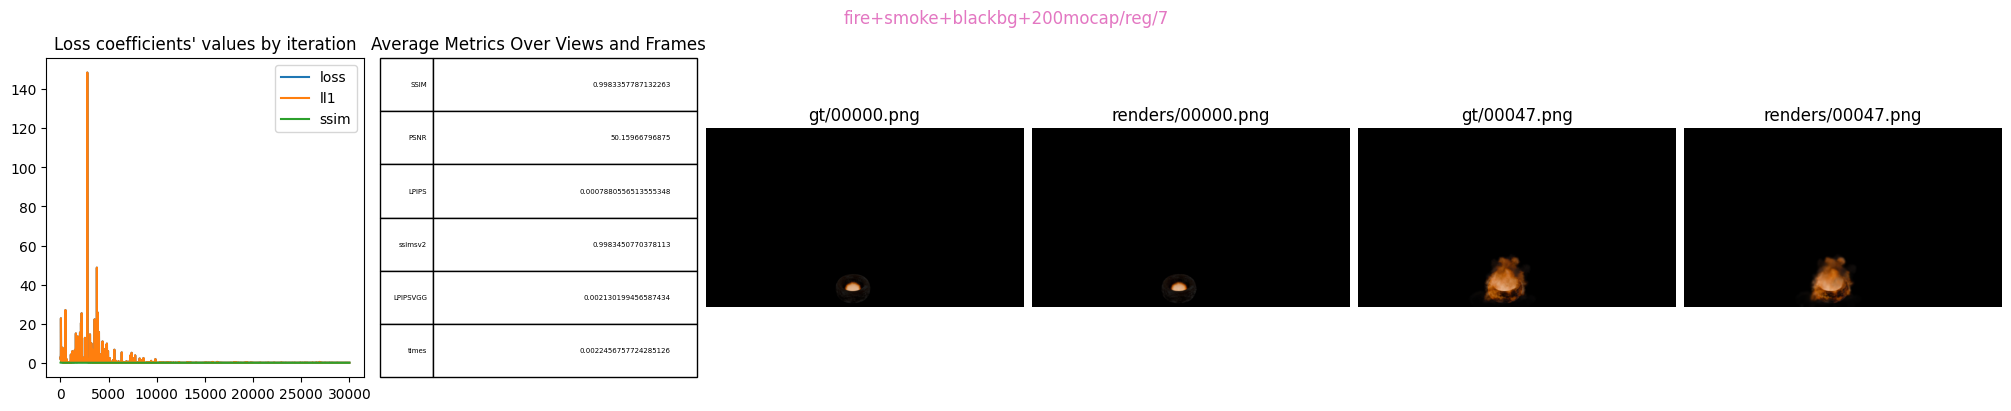

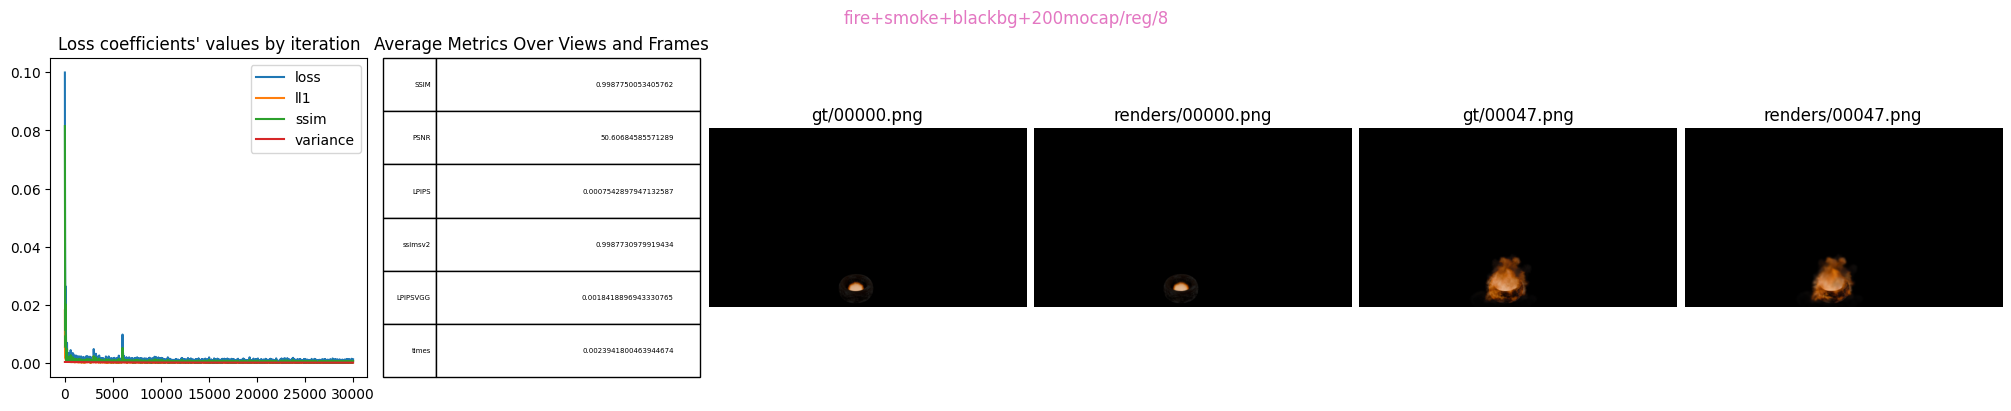

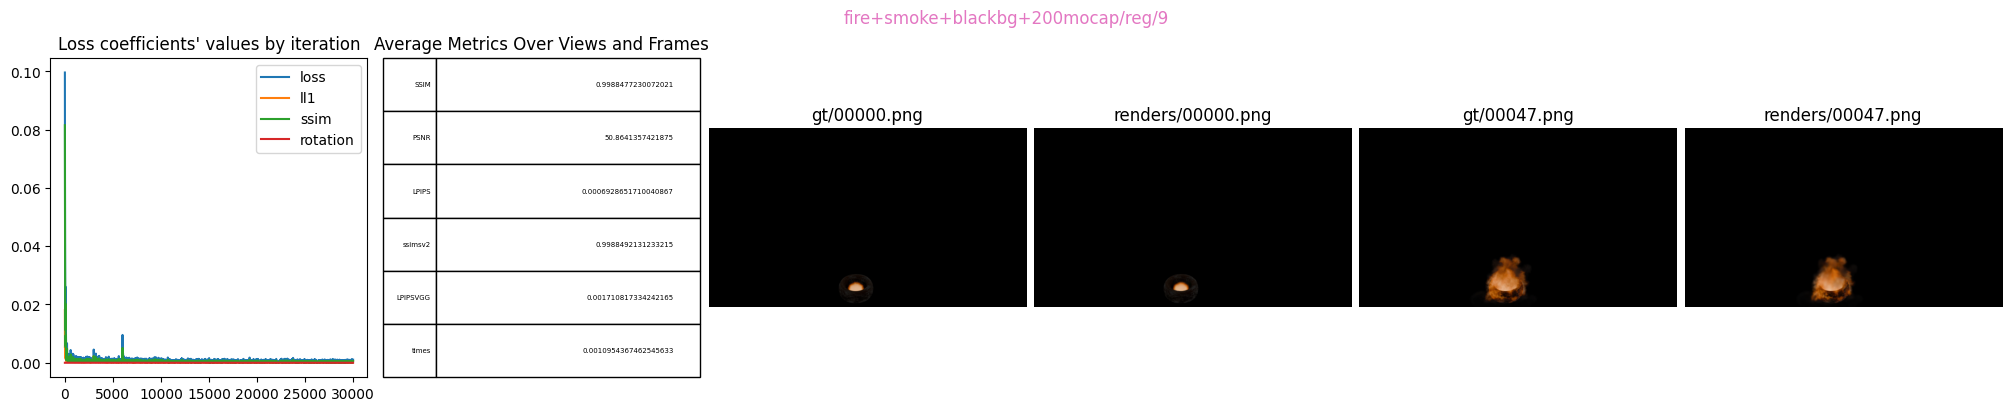

In [ ]:
stg_dir = Path("/mnt/NewVolume/aq85800/SpacetimeGaussians/output_sweep_tests")

reg_experiments = [
    "cloud+0transp+blackbg+200mocap/reg",
    "cloud+0transp+blackbg+200mocap_blenderpoints3d/reg",
    "cloud+0transp+noobject+blackbg+200mocap/reg",
    "teapot+box+blackbg+200mocap/reg",
    "fire+smoke+blackbg+200mocap/reg",
]


def iterate_experiments_dirs():
    for experiment in reg_experiments:
        for path in sorted((stg_dir/experiment).glob("*")):
            yield path


for experiment, title_color in zip(reg_experiments, gen_color_map("tab10")):
    for exp_dir in sorted((stg_dir/experiment).glob("*")):
        fig, axs = plt.subplots(1, 6, layout="constrained", figsize=(20, 4))
        iaxs = iter(axs)
        fig.suptitle("/".join(exp_dir.parts[-3:]), color=title_color)
        plot_loss_history(fig, iaxs, exp_dir)
        table_metrics(fig, iaxs, exp_dir)
        plot_gt_render_comparison(fig, iaxs, exp_dir)